In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Display basic information
print(data.head())
print(data.info())

                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title  Released_Year Certificate  Runtime  \
0  The Shawshank Redemption           1994           R      142   
1             The Godfather           1972           R      175   
2           The Dark Knight           2008           R      152   
3    The Godfather: Part II           1974           R      202   
4              12 Angry Men           1957           G       96   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   

                   

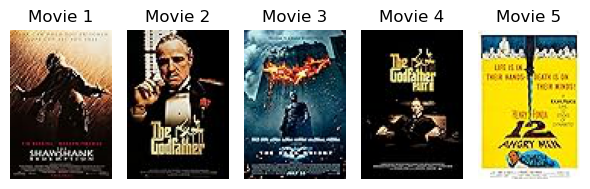

In [2]:
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

# Get the first 5 poster links from the dataset
poster_links = data['Poster_Link'].head(5)

# Plot the posters
plt.figure(figsize=(6, 2))
for i, link in enumerate(poster_links):
    try:
        # Fetch the image from the link
        response = requests.get(link)
        img = Image.open(BytesIO(response.content))
        
        # Display the image
        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Movie {i + 1}")
    except Exception as e:
        print(f"Error fetching image for Movie {i + 1}: {e}")

plt.tight_layout()
plt.show()


In [3]:
# Showing the head of the dataset
data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Genre_1,Genre_2,Genre_3
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,R,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0,Drama,NaN,NaN
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,R,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,Crime,Drama,NaN
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,R,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,Action,Crime,Drama
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,R,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0,Crime,Drama,NaN
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,G,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0,Crime,Drama,NaN


In [4]:
gross_stats = data['Gross'].describe()
print(gross_stats)

count    1.000000e+03
mean     5.915829e+07
std      1.022081e+08
min      1.305000e+03
25%      4.388794e+06
50%      1.682026e+07
75%      6.476449e+07
max      9.366622e+08
Name: Gross, dtype: float64


In [5]:
# This line is for finding out the missing values in the dataset
missing_values = data.isna().sum()
print("Missing Values in Each Column:\n", missing_values)

Missing Values in Each Column:
 Poster_Link        0
Series_Title       0
Released_Year      0
Certificate        0
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score         0
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross              0
Genre_1            0
Genre_2          105
Genre_3          354
dtype: int64


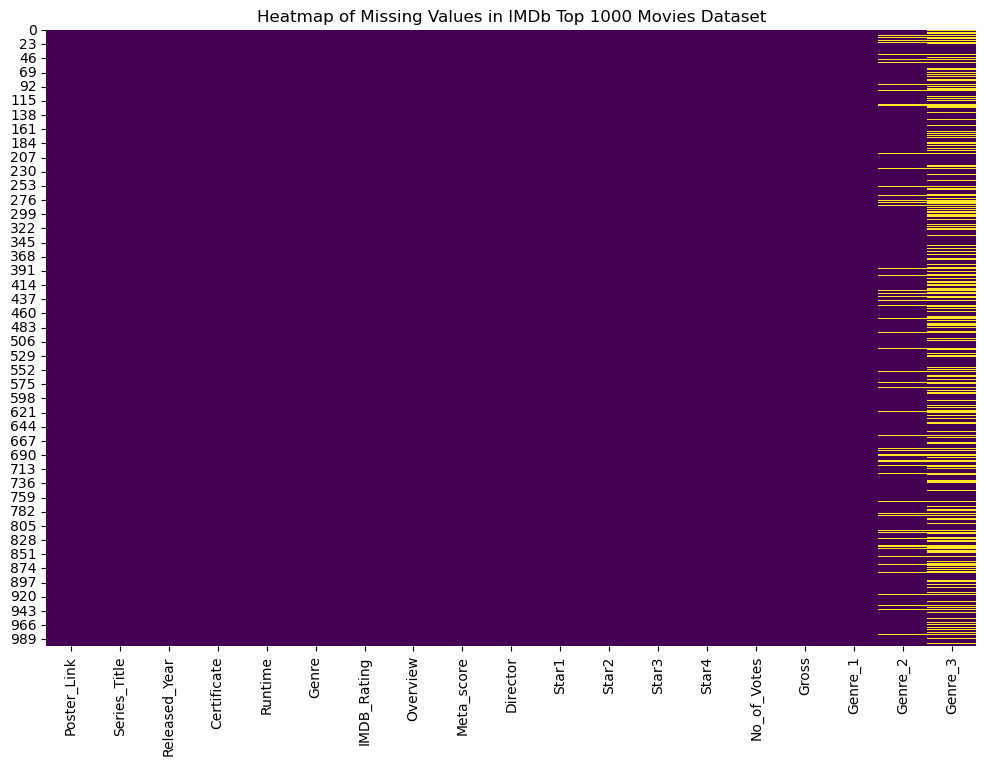

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot heatmap to visualize missing values
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values in IMDb Top 1000 Movies Dataset')
plt.show()

## Predicting the IMDB_Rating 

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Step 1: Data Cleaning
# Handle missing values by filling them with median or mode
data['Meta_score'] = data['Meta_score'].fillna(data['Meta_score'].median())
data['Gross'] = data['Gross'].fillna(data['Gross'].median())
data['Runtime'] = data['Runtime'].fillna(data['Runtime'].median())

# Drop rows with missing target variable
data = data.dropna(subset=['IMDB_Rating'])

# Step 2: Feature Encoding
# Use OneHotEncoder for categorical variables
categorical_features = ['Genre_1', 'Genre_2', 'Genre_3', 'Certificate', 'Director']
data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Step 3: Feature Selection
# Select relevant features and target variable
features = ['Runtime', 'Meta_score', 'Gross'] + [col for col in data_encoded.columns if col.startswith(tuple(categorical_features))]
X = data_encoded[features]
y = data_encoded['IMDB_Rating']

# Step 4: Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Step 7: Evaluate the Model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.050918584999999794
R-squared: 0.20568786659179195


Mean Squared Error: 0.050918584999999794
R-squared: 0.20568786659179195


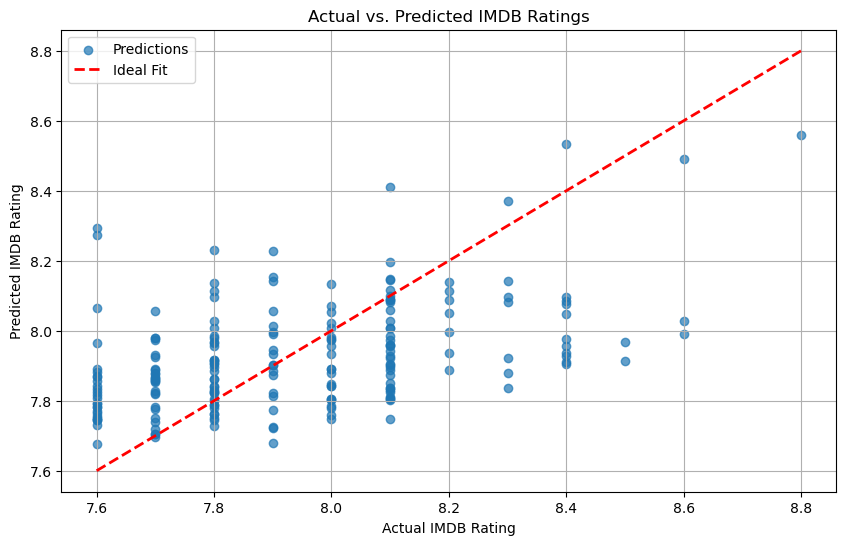

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Step 1: Data Cleaning
# Handle missing values by filling them with median or mode
data['Meta_score'] = data['Meta_score'].fillna(data['Meta_score'].median())
data['Gross'] = data['Gross'].fillna(data['Gross'].median())
data['Runtime'] = data['Runtime'].fillna(data['Runtime'].median())

# Drop rows with missing target variable
data = data.dropna(subset=['IMDB_Rating'])

# Step 2: Feature Encoding
# Use OneHotEncoder for categorical variables
categorical_features = ['Genre_1', 'Genre_2', 'Genre_3', 'Certificate', 'Director']
data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Step 3: Feature Selection
# Select relevant features and target variable
features = ['Runtime', 'Meta_score', 'Gross'] + [col for col in data_encoded.columns if col.startswith(tuple(categorical_features))]
X = data_encoded[features]
y = data_encoded['IMDB_Rating']

# Step 4: Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Step 7: Evaluate the Model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Step 8: Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('Actual IMDB Rating')
plt.ylabel('Predicted IMDB Rating')
plt.title('Actual vs. Predicted IMDB Ratings')
plt.legend()
plt.grid(True)
plt.show()


Mean Squared Error: 8653167875060328.0
R-squared: 0.35716152465935225


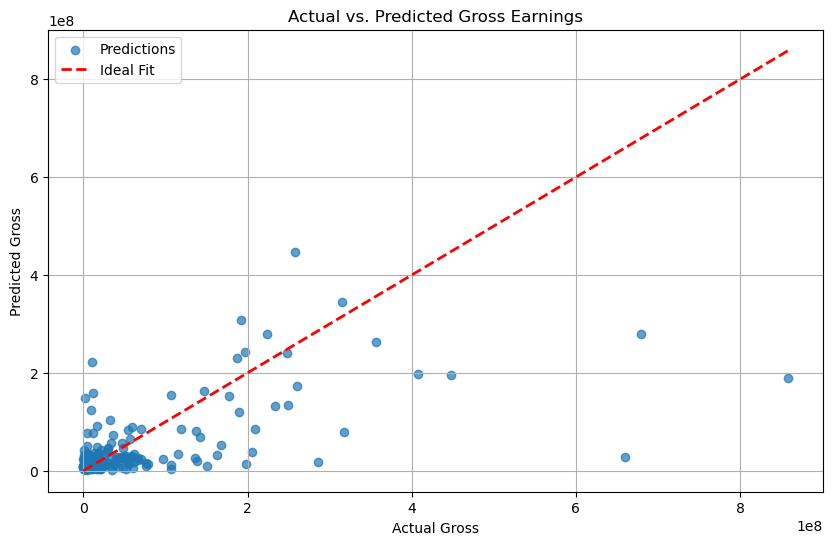

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Step 1: Data Cleaning
# Handle missing values by filling them with median or mode
data['Meta_score'] = data['Meta_score'].fillna(data['Meta_score'].median())
data['Gross'] = data['Gross'].fillna(data['Gross'].median())
data['Runtime'] = data['Runtime'].fillna(data['Runtime'].median())

# Drop rows with missing target variable
data = data.dropna(subset=['Gross'])

# Step 2: Feature Encoding
# Use OneHotEncoder for categorical variables
categorical_features = ['Genre_1', 'Genre_2', 'Genre_3', 'Certificate', 'Director']
data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Step 3: Feature Selection
# Select relevant features and target variable
features = ['Runtime', 'Meta_score', 'IMDB_Rating'] + [col for col in data_encoded.columns if col.startswith(tuple(categorical_features))]
X = data_encoded[features]
y = data_encoded['Gross']

# Step 4: Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Step 7: Evaluate the Model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Step 8: Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Gross')
plt.ylabel('Predicted Gross')
plt.title('Actual vs. Predicted Gross Earnings')
plt.legend()
plt.grid(True)
plt.show()


Mean Squared Error: 3.2839644387139693
R-squared: 0.17715532962854297


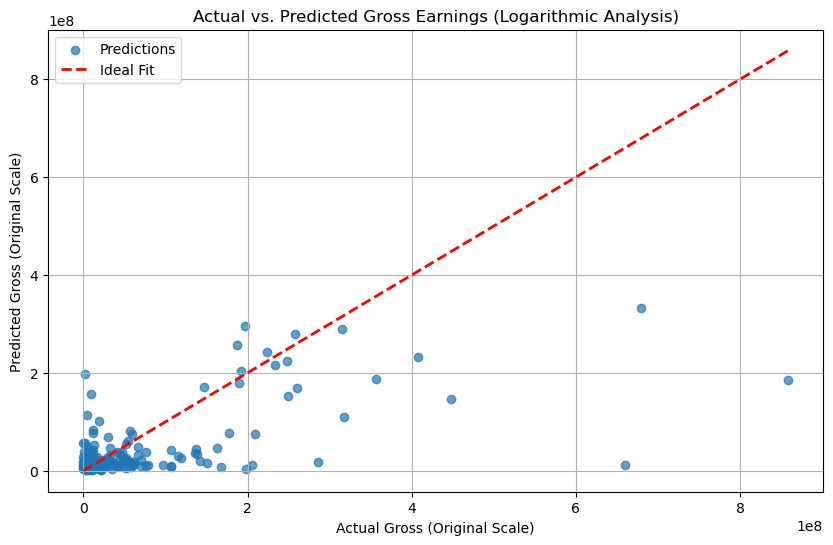

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Step 1: Data Cleaning
# Handle missing values by filling them with median or mode
data['Meta_score'] = data['Meta_score'].fillna(data['Meta_score'].median())
data['Gross'] = data['Gross'].fillna(data['Gross'].median())
data['Runtime'] = data['Runtime'].fillna(data['Runtime'].median())

# Drop rows with missing target variable
data = data.dropna(subset=['Gross'])

# Apply logarithmic transformation to the target variable 'Gross'
data['Log_Gross'] = np.log1p(data['Gross'])  # log1p to handle zero values safely

# Step 2: Feature Encoding
# Use OneHotEncoder for categorical variables
categorical_features = ['Genre_1', 'Genre_2', 'Genre_3', 'Certificate', 'Director']
data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Step 3: Feature Selection
# Select relevant features and target variable
features = ['Runtime', 'Meta_score', 'IMDB_Rating'] + [col for col in data_encoded.columns if col.startswith(tuple(categorical_features))]
X = data_encoded[features]
y = data_encoded['Log_Gross']  # Use the log-transformed target variable

# Step 4: Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Step 7: Evaluate the Model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Step 8: Visualization
# Convert logarithmic values back to original scale for visualization
y_test_original = np.expm1(y_test)  # expm1 reverses log1p transformation
y_pred_original = np.expm1(y_pred)

plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred_original, alpha=0.7, label='Predictions')
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Gross (Original Scale)')
plt.ylabel('Predicted Gross (Original Scale)')
plt.title('Actual vs. Predicted Gross Earnings (Logarithmic Analysis)')
plt.legend()
plt.grid(True)
plt.show()


Mean Squared Error (Normalized): 0.009704040370611651
R-squared (Normalized): 0.36752388541645586


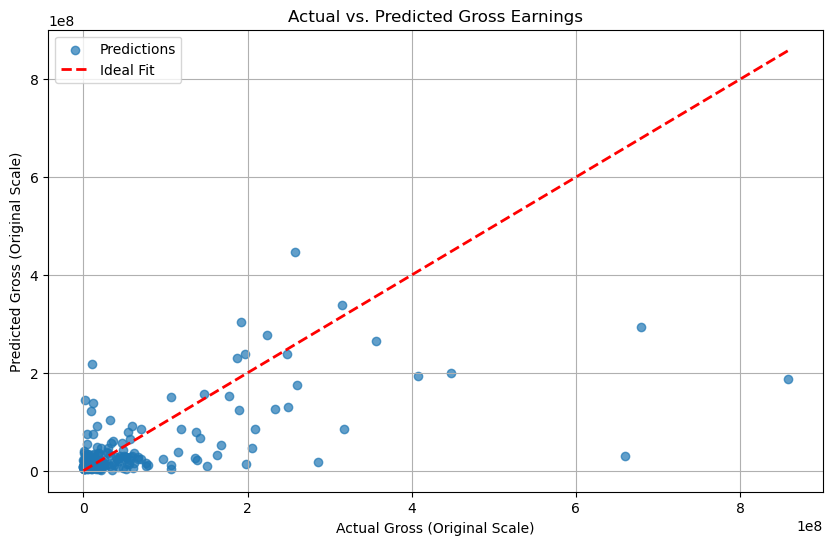

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Step 1: Data Cleaning
# Handle missing values by filling them with median or mode
data['Meta_score'] = data['Meta_score'].fillna(data['Meta_score'].median())
data['Gross'] = data['Gross'].fillna(data['Gross'].median())
data['Runtime'] = data['Runtime'].fillna(data['Runtime'].median())

# Drop rows with missing target variable
data = data.dropna(subset=['Gross'])

# Step 2: Feature Encoding
# Use OneHotEncoder for categorical variables
categorical_features = ['Genre_1', 'Genre_2', 'Genre_3', 'Certificate', 'Director']
data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Step 3: Feature Selection
# Select relevant features and target variable
features = ['Runtime', 'Meta_score', 'IMDB_Rating'] + [col for col in data_encoded.columns if col.startswith(tuple(categorical_features))]
X = data_encoded[features]
y = data_encoded['Gross']

# Step 4: Normalize the Target Variable (Gross)
scaler_y = MinMaxScaler()  # Scale Gross between 0 and 1
y = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()  # Flatten the array

# Step 5: Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Feature Scaling
scaler_X = StandardScaler()  # Standardize input features
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

# Step 7: Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Step 8: Evaluate the Model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (Normalized): {mse}")
print(f"R-squared (Normalized): {r2}")

# Step 9: Inverse Transform the Target Variable for Comparison
y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()
y_pred_original = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).ravel()

# Step 10: Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred_original, alpha=0.7, label='Predictions')
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Gross (Original Scale)')
plt.ylabel('Predicted Gross (Original Scale)')
plt.title('Actual vs. Predicted Gross Earnings')
plt.legend()
plt.grid(True)
plt.show()


Mean Squared Error (Normalized): 0.009704040370611651
R-squared (Normalized): 0.36752388541645586


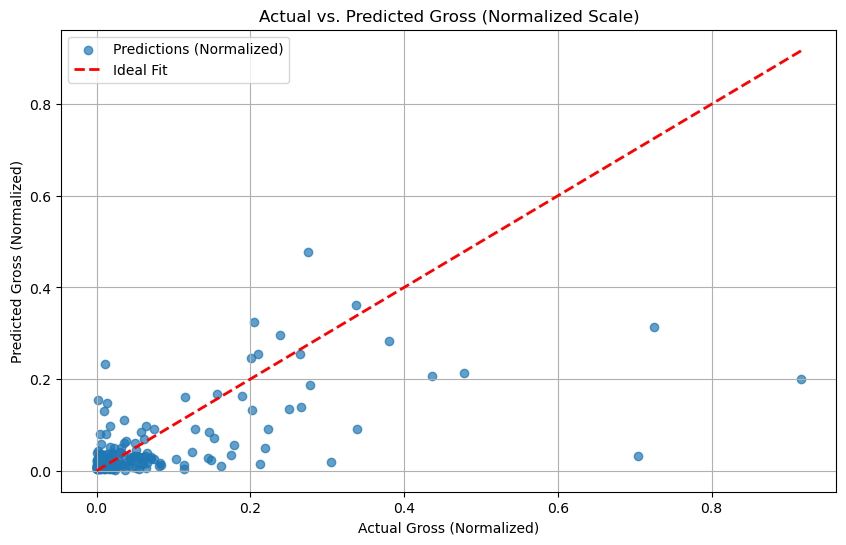

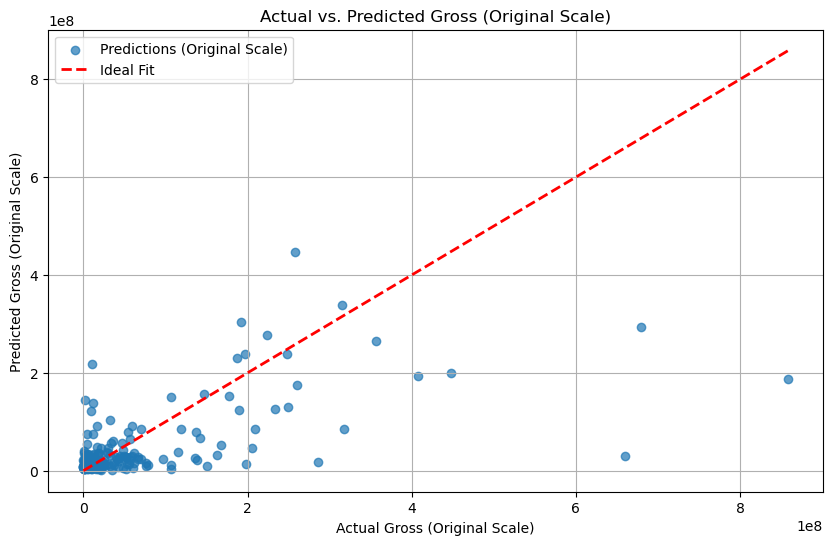

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Step 1: Data Cleaning
# Handle missing values by filling them with median or mode
data['Meta_score'] = data['Meta_score'].fillna(data['Meta_score'].median())
data['Gross'] = data['Gross'].fillna(data['Gross'].median())
data['Runtime'] = data['Runtime'].fillna(data['Runtime'].median())

# Drop rows with missing target variable
data = data.dropna(subset=['Gross'])

# Step 2: Feature Encoding
# Use OneHotEncoder for categorical variables
categorical_features = ['Genre_1', 'Genre_2', 'Genre_3', 'Certificate', 'Director']
data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Step 3: Feature Selection
# Select relevant features and target variable
features = ['Runtime', 'Meta_score', 'IMDB_Rating'] + [col for col in data_encoded.columns if col.startswith(tuple(categorical_features))]
X = data_encoded[features]
y = data_encoded['Gross']

# Step 4: Normalize the Target Variable (Gross)
scaler_y = MinMaxScaler()  # Scale Gross between 0 and 1
y = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()  # Flatten the array

# Step 5: Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Feature Scaling
scaler_X = StandardScaler()  # Standardize input features
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

# Step 7: Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Step 8: Evaluate the Model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (Normalized): {mse}")
print(f"R-squared (Normalized): {r2}")

# Step 9: Inverse Transform the Target Variable for Original Scale Comparison
y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()
y_pred_original = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).ravel()

# Step 10: Visualization for Normalized Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label='Predictions (Normalized)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Gross (Normalized)')
plt.ylabel('Predicted Gross (Normalized)')
plt.title('Actual vs. Predicted Gross (Normalized Scale)')
plt.legend()
plt.grid(True)
plt.show()

# Step 11: Visualization for Original Scale Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred_original, alpha=0.7, label='Predictions (Original Scale)')
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Gross (Original Scale)')
plt.ylabel('Predicted Gross (Original Scale)')
plt.title('Actual vs. Predicted Gross (Original Scale)')
plt.legend()
plt.grid(True)
plt.show()


Accuracy: 0.61

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.56      0.49      0.52        68
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00        10
           4       0.64      0.83      0.73       107

    accuracy                           0.61       200
   macro avg       0.24      0.26      0.25       200
weighted avg       0.54      0.61      0.57       200



C:\Users\baradara.EGR\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\baradara.EGR\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\baradara.EGR\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

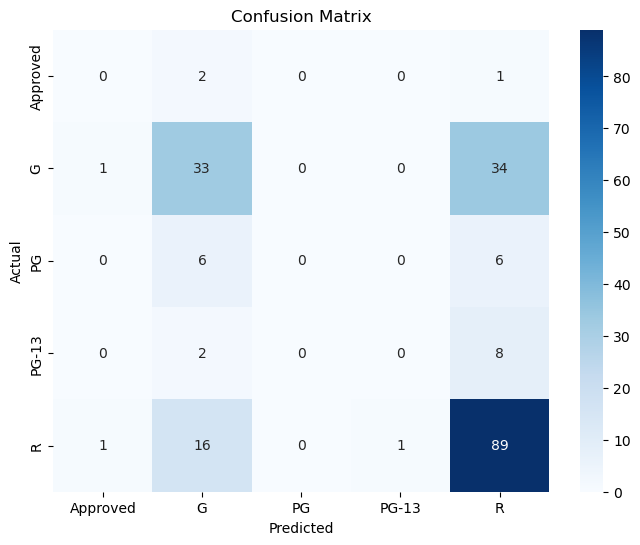

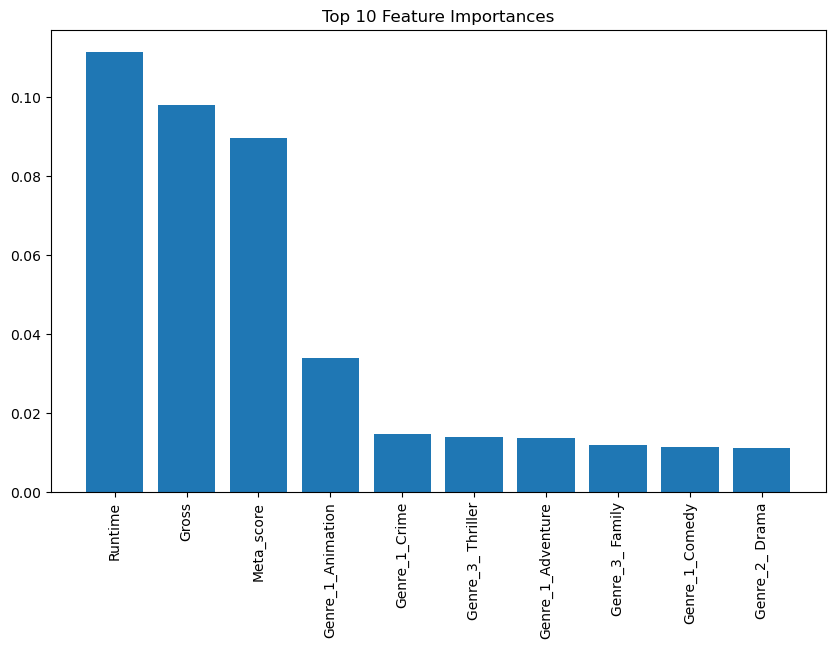

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Step 1: Data Cleaning
# Handle missing values
data['Meta_score'] = data['Meta_score'].fillna(data['Meta_score'].median())
data['Gross'] = data['Gross'].fillna(data['Gross'].median())
data['Runtime'] = data['Runtime'].fillna(data['Runtime'].median())
data = data.dropna(subset=['IMDB_Rating', 'Certificate'])

# Encode Certificate for Classification
label_encoder = LabelEncoder()
data['Certificate_encoded'] = label_encoder.fit_transform(data['Certificate'])

# Step 2: Choose Task (Uncomment the desired option)
# Option 1: Predict Certificate
target_variable = 'Certificate_encoded'  # Encoded Certificate

# Option 2: Predict Movie Success (IMDB_Rating > 8.0)
# data['Movie_Success'] = (data['IMDB_Rating'] > 8.0).astype(int)  # Binary classification
# target_variable = 'Movie_Success'

# Step 3: Feature Encoding
categorical_features = ['Genre_1', 'Genre_2', 'Genre_3', 'Director']
data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Select Features and Target
features = ['Runtime', 'Meta_score', 'Gross'] + [col for col in data_encoded.columns if col.startswith(tuple(categorical_features))]
X = data_encoded[features]
y = data_encoded[target_variable]

# Step 4: Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 5: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 7: Evaluate the Model
y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance
importances = model.feature_importances_
feature_names = X.columns
sorted_indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_indices[:10])), importances[sorted_indices[:10]], align="center")
plt.xticks(range(len(sorted_indices[:10])), feature_names[sorted_indices[:10]], rotation=90)
plt.title("Top 10 Feature Importances")
plt.show()


Accuracy: 0.68

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.96      0.80       136
           1       0.50      0.08      0.14        64

    accuracy                           0.68       200
   macro avg       0.59      0.52      0.47       200
weighted avg       0.63      0.68      0.59       200



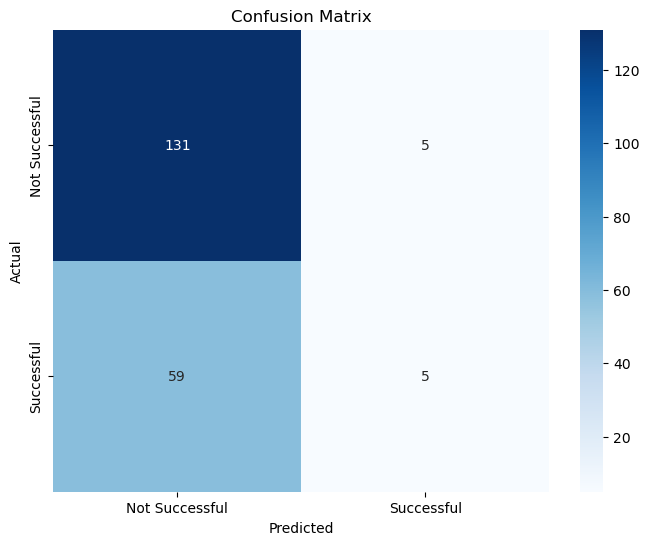

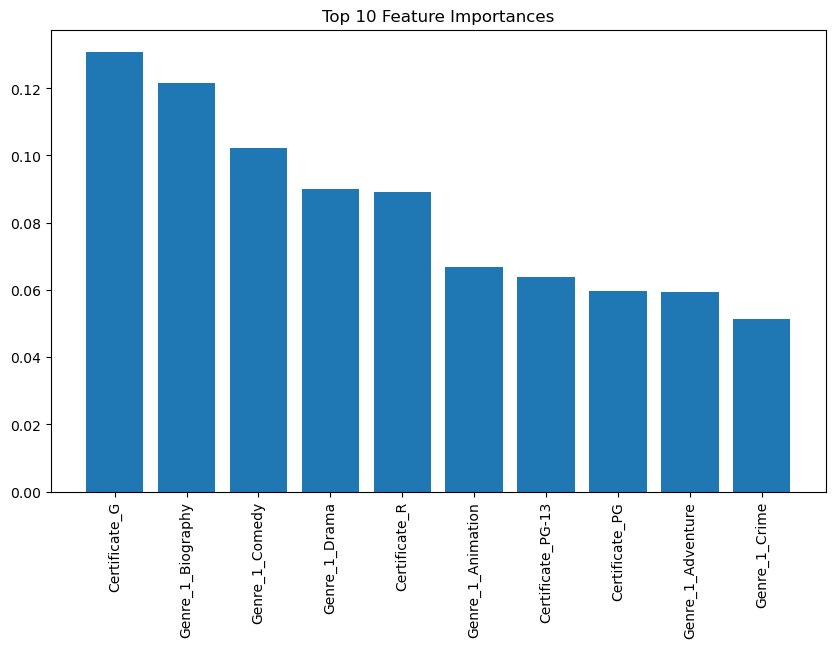

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Step 1: Data Cleaning
# Handle missing values
data['Runtime'] = data['Runtime'].fillna(data['Runtime'].median())
data = data.dropna(subset=['IMDB_Rating', 'Certificate', 'Genre_1'])

# Step 2: Create Target Variable (Movie Success)
# Success = 1 if IMDB_Rating > 8.0, else 0
data['Movie_Success'] = (data['IMDB_Rating'] > 8.0).astype(int)

# Step 3: Feature Encoding
# Use OneHotEncoder for Genre and Certificate
encoded_data = pd.get_dummies(data, columns=['Genre_1', 'Certificate'], drop_first=True)

# Select Features (e.g., Genre, Certificate)
features = [col for col in encoded_data.columns if col.startswith('Genre_1') or col.startswith('Certificate')]
X = encoded_data[features]
y = encoded_data['Movie_Success']

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 5: Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 6: Evaluate the Model
y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 7: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Successful", "Successful"], yticklabels=["Not Successful", "Successful"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 8: Feature Importance
importances = model.feature_importances_
feature_names = X.columns
sorted_indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_indices[:10])), importances[sorted_indices[:10]], align="center")
plt.xticks(range(len(sorted_indices[:10])), feature_names[sorted_indices[:10]], rotation=90)
plt.title("Top 10 Feature Importances")
plt.show()


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
import numpy as np

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Step 1: Data Cleaning
data['Runtime'] = data['Runtime'].fillna(data['Runtime'].median())
data = data.dropna(subset=['IMDB_Rating', 'Certificate', 'Genre_1'])

# Step 2: Create Target Variable (Movie Success)
data['Movie_Success'] = (data['IMDB_Rating'] > 8.0).astype(int)

# Step 3: Feature Encoding
# Use OneHotEncoder for Genre and Certificate
encoded_data = pd.get_dummies(data, columns=['Genre_1', 'Certificate'], drop_first=True)

# Select Features (e.g., Genre, Certificate)
features = [col for col in encoded_data.columns if col.startswith('Genre_1') or col.startswith('Certificate')]
X = encoded_data[features]
y = encoded_data['Movie_Success']

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 5: Train the Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get genre and certificate options from the dataset
genres = sorted(data['Genre_1'].unique())
certificates = sorted(data['Certificate'].unique())

# Function to predict success based on user input
def predict_movie_success():
    print("\n--- Predict Movie Success ---")
    
    # Get user inputs
    print("\nChoose a genre from the following options:")
    for idx, genre in enumerate(genres, start=1):
        print(f"{idx}. {genre}")
    genre_choice = int(input("Enter the number corresponding to the genre: ")) - 1
    genre_input = genres[genre_choice]
    
    print("\nChoose a certificate from the following options:")
    for idx, cert in enumerate(certificates, start=1):
        print(f"{idx}. {cert}")
    certificate_choice = int(input("Enter the number corresponding to the certificate: ")) - 1
    certificate_input = certificates[certificate_choice]
    
    # Initialize feature vector
    input_features = np.zeros(len(features))
    
    # Set the corresponding one-hot encoded values
    if f"Genre_1_{genre_input}" in features:
        input_features[features.index(f"Genre_1_{genre_input}")] = 1
    if f"Certificate_{certificate_input}" in features:
        input_features[features.index(f"Certificate_{certificate_input}")] = 1
    
    # Predict success
    prediction = model.predict([input_features])[0]
    success_message = "successful!" if prediction == 1 else "not successful."
    print(f"\nThe movie is predicted to be {success_message}")

# Run the prediction function
predict_movie_success()



--- Predict Movie Success ---

Choose a genre from the following options:
1. Action
2. Adventure
3. Animation
4. Biography
5. Comedy
6. Crime
7. Drama
8. Family
9. Fantasy
10. Film-Noir
11. Horror
12. Mystery
13. Thriller
14. Western


Enter the number corresponding to the genre:  1



Choose a certificate from the following options:
1. Approved
2. G
3. PG
4. PG-13
5. R


Enter the number corresponding to the certificate:  1



The movie is predicted to be not successful.


C:\Users\baradara.EGR\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



Model Accuracy: 0.68


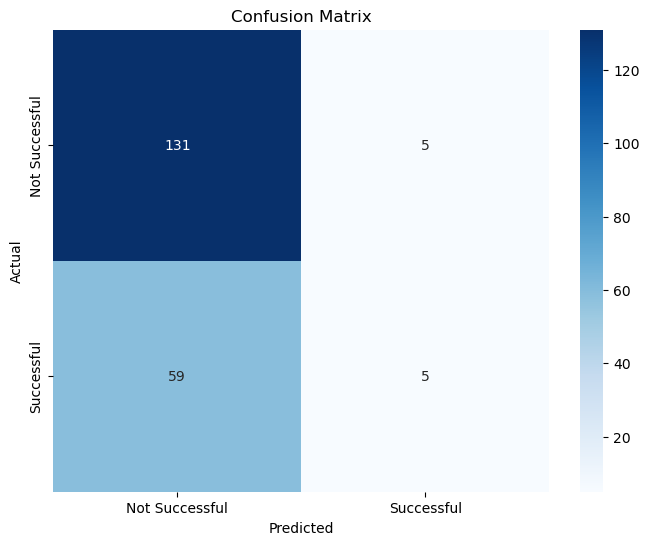

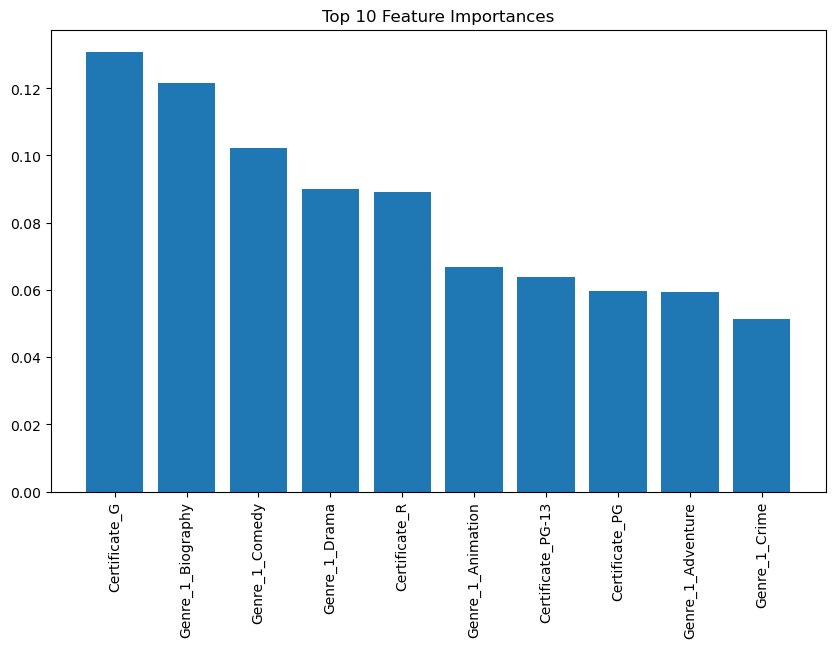


--- Predict Movie Success ---

Choose a genre from the following options:
1. Action
2. Adventure
3. Animation
4. Biography
5. Comedy
6. Crime
7. Drama
8. Family
9. Fantasy
10. Film-Noir
11. Horror
12. Mystery
13. Thriller
14. Western


Enter the number corresponding to the genre:  1



Choose a certificate from the following options:
1. Approved
2. G
3. PG
4. PG-13
5. R


Enter the number corresponding to the certificate:  1



The movie is predicted to be not successful.


C:\Users\baradara.EGR\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Step 1: Data Cleaning
data['Runtime'] = data['Runtime'].fillna(data['Runtime'].median())
data = data.dropna(subset=['IMDB_Rating', 'Certificate', 'Genre_1'])

# Step 2: Create Target Variable (Movie Success)
data['Movie_Success'] = (data['IMDB_Rating'] > 8.0).astype(int)

# Step 3: Feature Encoding
encoded_data = pd.get_dummies(data, columns=['Genre_1', 'Certificate'], drop_first=True)

# Select Features (e.g., Genre, Certificate)
features = [col for col in encoded_data.columns if col.startswith('Genre_1') or col.startswith('Certificate')]
X = encoded_data[features]
y = encoded_data['Movie_Success']

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 5: Train the Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 6: Evaluate the Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")

# Visualization 1: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Successful", "Successful"], yticklabels=["Not Successful", "Successful"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualization 2: Feature Importance
importances = model.feature_importances_
feature_names = X.columns
sorted_indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_indices[:10])), importances[sorted_indices[:10]], align="center")
plt.xticks(range(len(sorted_indices[:10])), feature_names[sorted_indices[:10]], rotation=90)
plt.title("Top 10 Feature Importances")
plt.show()

# Get genre and certificate options from the dataset
genres = sorted(data['Genre_1'].unique())
certificates = sorted(data['Certificate'].unique())

# Function to predict success based on user input and show accuracy
def predict_movie_success():
    print("\n--- Predict Movie Success ---")
    
    # Get user inputs
    print("\nChoose a genre from the following options:")
    for idx, genre in enumerate(genres, start=1):
        print(f"{idx}. {genre}")
    genre_choice = int(input("Enter the number corresponding to the genre: ")) - 1
    genre_input = genres[genre_choice]
    
    print("\nChoose a certificate from the following options:")
    for idx, cert in enumerate(certificates, start=1):
        print(f"{idx}. {cert}")
    certificate_choice = int(input("Enter the number corresponding to the certificate: ")) - 1
    certificate_input = certificates[certificate_choice]
    
    # Initialize feature vector
    input_features = np.zeros(len(features))
    
    # Set the corresponding one-hot encoded values
    if f"Genre_1_{genre_input}" in features:
        input_features[features.index(f"Genre_1_{genre_input}")] = 1
    if f"Certificate_{certificate_input}" in features:
        input_features[features.index(f"Certificate_{certificate_input}")] = 1
    
    # Predict success
    prediction = model.predict([input_features])[0]
    success_message = "successful!" if prediction == 1 else "not successful."
    print(f"\nThe movie is predicted to be {success_message}")

# Run the prediction function
predict_movie_success()



Classification Model Accuracy: 0.68
Regression Model MSE: 0.07
Regression Model RMSE: 0.26


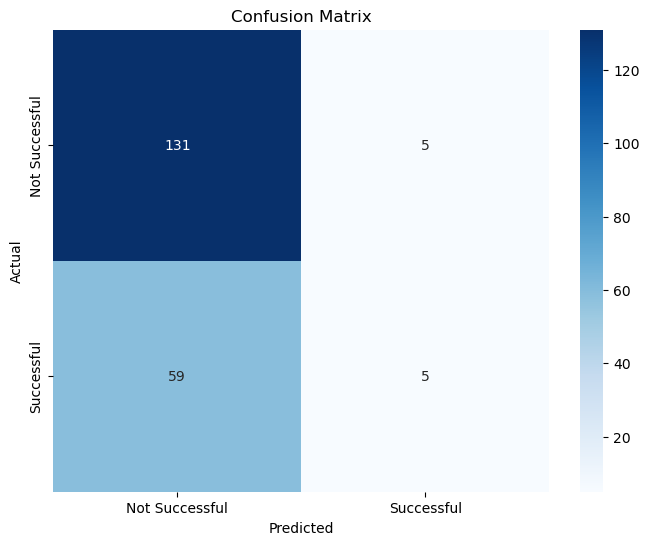

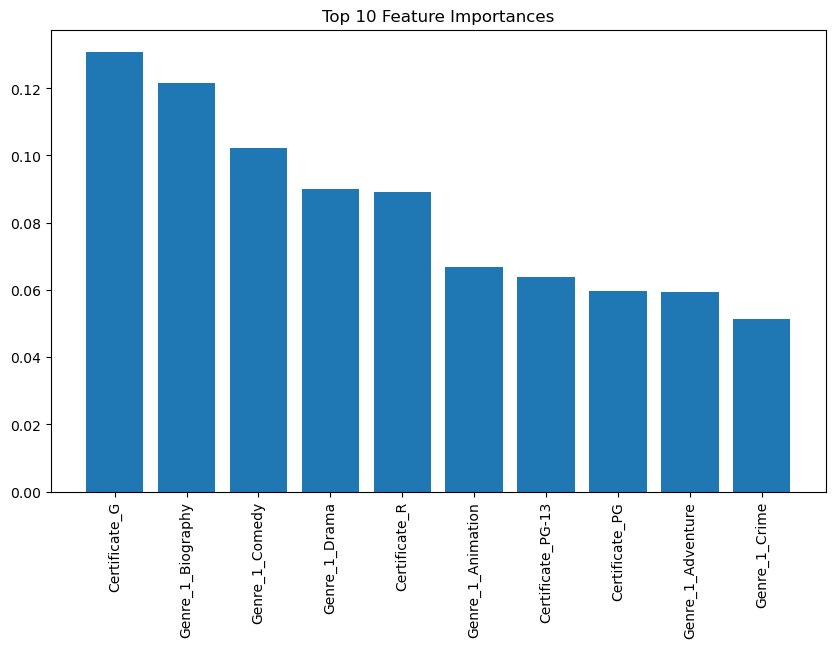


--- Predict Movie Success and IMDB Rating ---

Choose a genre from the following options:
1. Action
2. Adventure
3. Animation
4. Biography
5. Comedy
6. Crime
7. Drama
8. Family
9. Fantasy
10. Film-Noir
11. Horror
12. Mystery
13. Thriller
14. Western


Enter the number corresponding to the genre:  1



Choose a certificate from the following options:
1. Approved
2. G
3. PG
4. PG-13
5. R


Enter the number corresponding to the certificate:  1



The movie is predicted to be not successful.
The predicted IMDB rating is: 7.69


C:\Users\baradara.EGR\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\baradara.EGR\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Step 1: Data Cleaning
data['Runtime'] = data['Runtime'].fillna(data['Runtime'].median())
data['IMDB_Rating'] = data['IMDB_Rating'].fillna(data['IMDB_Rating'].median())
data = data.dropna(subset=['Certificate', 'Genre_1'])

# Step 2: Create Target Variable (Movie Success)
data['Movie_Success'] = (data['IMDB_Rating'] > 8.0).astype(int)

# Step 3: Feature Encoding
encoded_data = pd.get_dummies(data, columns=['Genre_1', 'Certificate'], drop_first=True)

# Select Features for Both Classifier and Regressor
features = [col for col in encoded_data.columns if col.startswith('Genre_1') or col.startswith('Certificate')]
X = encoded_data[features]
y_classification = encoded_data['Movie_Success']
y_regression = encoded_data['IMDB_Rating']

# Step 4: Train-Test Split
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_classification, test_size=0.2, random_state=42, stratify=y_classification)
_, _, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)

# Step 5: Train the Models
# Classification Model
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train_class)

# Regression Model
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train_reg)

# Step 6: Evaluate the Models
# Classification
y_pred_class = classifier.predict(X_test)
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"\nClassification Model Accuracy: {accuracy:.2f}")

# Regression
y_pred_reg = regressor.predict(X_test)
mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f"Regression Model MSE: {mse:.2f}")
print(f"Regression Model RMSE: {np.sqrt(mse):.2f}")

# Visualization: Confusion Matrix for Classification
conf_matrix = confusion_matrix(y_test_class, y_pred_class)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Successful", "Successful"], yticklabels=["Not Successful", "Successful"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualization: Feature Importance
importances = classifier.feature_importances_
feature_names = X.columns
sorted_indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_indices[:10])), importances[sorted_indices[:10]], align="center")
plt.xticks(range(len(sorted_indices[:10])), feature_names[sorted_indices[:10]], rotation=90)
plt.title("Top 10 Feature Importances")
plt.show()

# Get genre and certificate options from the dataset
genres = sorted(data['Genre_1'].unique())
certificates = sorted(data['Certificate'].unique())

# Function to predict success and IMDB_Rating based on user input
def predict_movie_success_and_rating():
    print("\n--- Predict Movie Success and IMDB Rating ---")
    
    # Get user inputs
    print("\nChoose a genre from the following options:")
    for idx, genre in enumerate(genres, start=1):
        print(f"{idx}. {genre}")
    genre_choice = int(input("Enter the number corresponding to the genre: ")) - 1
    genre_input = genres[genre_choice]
    
    print("\nChoose a certificate from the following options:")
    for idx, cert in enumerate(certificates, start=1):
        print(f"{idx}. {cert}")
    certificate_choice = int(input("Enter the number corresponding to the certificate: ")) - 1
    certificate_input = certificates[certificate_choice]
    
    # Initialize feature vector
    input_features = np.zeros(len(features))
    
    # Set the corresponding one-hot encoded values
    if f"Genre_1_{genre_input}" in features:
        input_features[features.index(f"Genre_1_{genre_input}")] = 1
    if f"Certificate_{certificate_input}" in features:
        input_features[features.index(f"Certificate_{certificate_input}")] = 1
    
    # Predict success
    prediction_class = classifier.predict([input_features])[0]
    success_message = "successful!" if prediction_class == 1 else "not successful."
    print(f"\nThe movie is predicted to be {success_message}")
    
    # Predict IMDB Rating
    prediction_rating = regressor.predict([input_features])[0]
    print(f"The predicted IMDB rating is: {prediction_rating:.2f}")

# Run the prediction function
predict_movie_success_and_rating()


## Doing the same for Gross Revenue


Classification Model Accuracy: 0.68
Regression Model MSE: 13995718900072568.00
Regression Model RMSE: 118303503.33


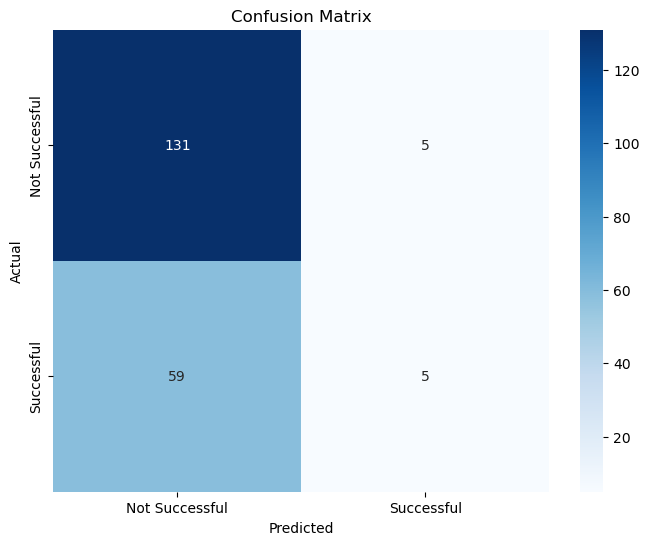

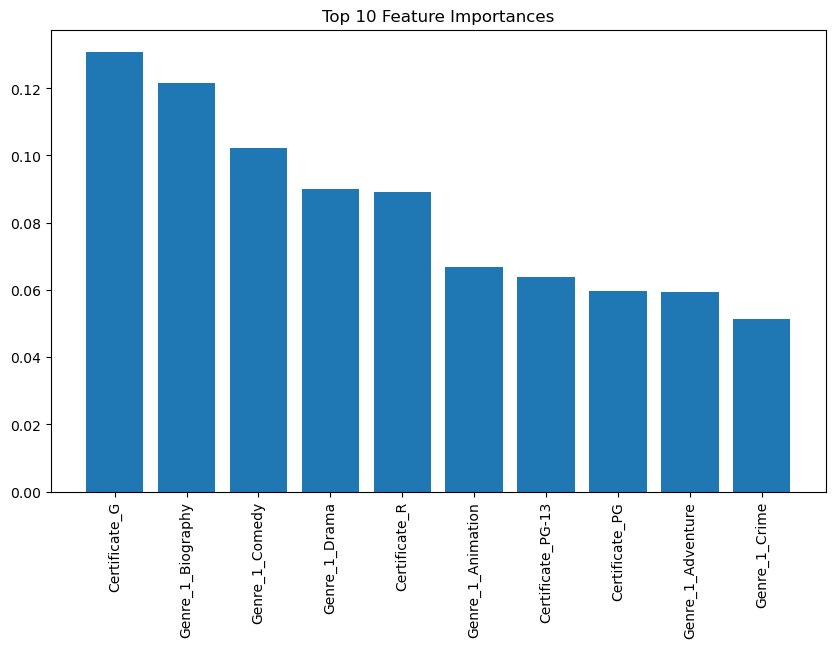


--- Predict Movie Success and Gross Revenue ---

Choose a genre from the following options:
1. Action
2. Adventure
3. Animation
4. Biography
5. Comedy
6. Crime
7. Drama
8. Family
9. Fantasy
10. Film-Noir
11. Horror
12. Mystery
13. Thriller
14. Western


Enter the number corresponding to the genre:  1



Choose a certificate from the following options:
1. Approved
2. G
3. PG
4. PG-13
5. R


Enter the number corresponding to the certificate:  1



The movie is predicted to be not successful.
The predicted gross revenue is: $12,585,220.00


C:\Users\baradara.EGR\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\baradara.EGR\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Step 1: Data Cleaning
data['Runtime'] = data['Runtime'].fillna(data['Runtime'].median())
data['Gross'] = data['Gross'].fillna(data['Gross'].median())
data = data.dropna(subset=['IMDB_Rating', 'Certificate', 'Genre_1'])

# Step 2: Create Target Variable (Movie Success)
data['Movie_Success'] = (data['IMDB_Rating'] > 8.0).astype(int)

# Step 3: Feature Encoding
encoded_data = pd.get_dummies(data, columns=['Genre_1', 'Certificate'], drop_first=True)

# Select Features for Both Classifier and Regressor
features = [col for col in encoded_data.columns if col.startswith('Genre_1') or col.startswith('Certificate')]
X = encoded_data[features]
y_classification = encoded_data['Movie_Success']
y_regression = encoded_data['Gross']

# Step 4: Train-Test Split
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_classification, test_size=0.2, random_state=42, stratify=y_classification)
_, _, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)

# Step 5: Train the Models
# Classification Model
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train_class)

# Regression Model
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train_reg)

# Step 6: Evaluate the Models
# Classification
y_pred_class = classifier.predict(X_test)
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"\nClassification Model Accuracy: {accuracy:.2f}")

# Regression
y_pred_reg = regressor.predict(X_test)
mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f"Regression Model MSE: {mse:.2f}")
print(f"Regression Model RMSE: {np.sqrt(mse):.2f}")

# Visualization: Confusion Matrix for Classification
conf_matrix = confusion_matrix(y_test_class, y_pred_class)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Successful", "Successful"], yticklabels=["Not Successful", "Successful"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualization: Feature Importance
importances = classifier.feature_importances_
feature_names = X.columns
sorted_indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_indices[:10])), importances[sorted_indices[:10]], align="center")
plt.xticks(range(len(sorted_indices[:10])), feature_names[sorted_indices[:10]], rotation=90)
plt.title("Top 10 Feature Importances")
plt.show()

# Get genre and certificate options from the dataset
genres = sorted(data['Genre_1'].unique())
certificates = sorted(data['Certificate'].unique())

# Function to predict success and gross revenue based on user input
def predict_movie_success_and_gross():
    print("\n--- Predict Movie Success and Gross Revenue ---")
    
    # Get user inputs
    print("\nChoose a genre from the following options:")
    for idx, genre in enumerate(genres, start=1):
        print(f"{idx}. {genre}")
    genre_choice = int(input("Enter the number corresponding to the genre: ")) - 1
    genre_input = genres[genre_choice]
    
    print("\nChoose a certificate from the following options:")
    for idx, cert in enumerate(certificates, start=1):
        print(f"{idx}. {cert}")
    certificate_choice = int(input("Enter the number corresponding to the certificate: ")) - 1
    certificate_input = certificates[certificate_choice]
    
    # Initialize feature vector
    input_features = np.zeros(len(features))
    
    # Set the corresponding one-hot encoded values
    if f"Genre_1_{genre_input}" in features:
        input_features[features.index(f"Genre_1_{genre_input}")] = 1
    if f"Certificate_{certificate_input}" in features:
        input_features[features.index(f"Certificate_{certificate_input}")] = 1
    
    # Predict success
    prediction_class = classifier.predict([input_features])[0]
    success_message = "successful!" if prediction_class == 1 else "not successful."
    print(f"\nThe movie is predicted to be {success_message}")
    
    # Predict Gross Revenue
    prediction_gross = regressor.predict([input_features])[0]
    print(f"The predicted gross revenue is: ${prediction_gross:,.2f}")

# Run the prediction function
predict_movie_success_and_gross()


## Clustring second suggestion

C:\Users\baradara.EGR\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\baradara.EGR\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\baradara.EGR\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\baradara.EGR\AppData\Local\anaconda3\Lib\site-packages\sklearn\c

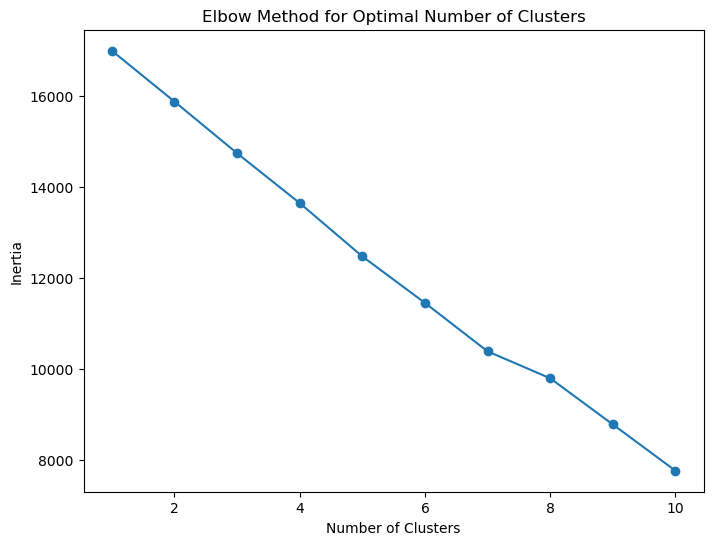

C:\Users\baradara.EGR\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


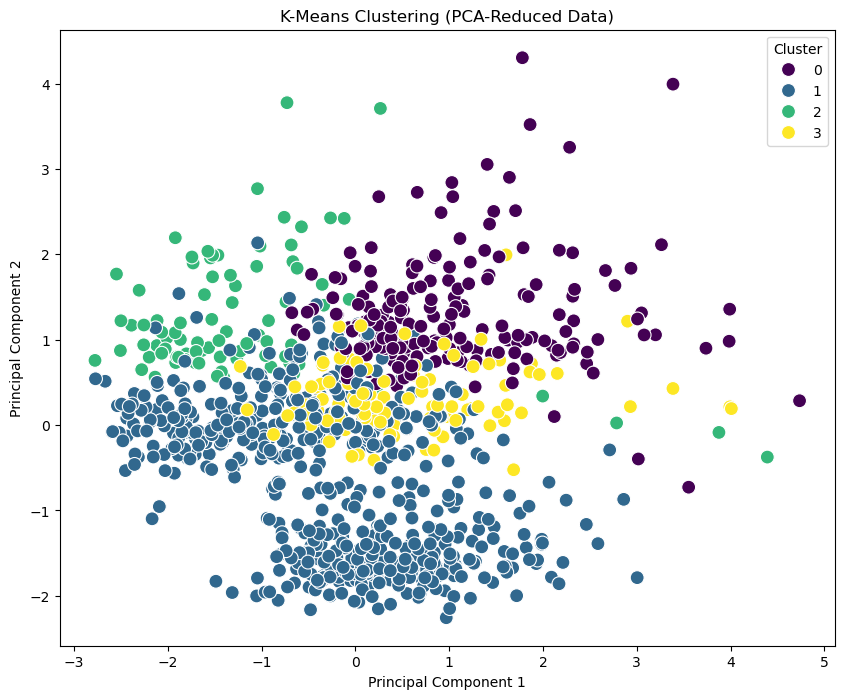


Cluster Summary:
             Runtime  Meta_score         Gross  IMDB_Rating
Cluster                                                   
0        138.935644   77.451485  1.236927e+08     7.987129
1        119.913907   78.097848  3.540059e+07     7.924834
2        102.000000   81.001149  1.072976e+08     7.948276
3        126.392523   77.415888  3.229464e+07     8.016822


TypeError: agg function failed [how->mean,dtype->object]

In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Step 1: Data Cleaning
data['Runtime'] = data['Runtime'].fillna(data['Runtime'].median())
data['Meta_score'] = data['Meta_score'].fillna(data['Meta_score'].median())
data['Gross'] = data['Gross'].fillna(data['Gross'].median())
data = data.dropna(subset=['IMDB_Rating', 'Certificate', 'Genre_1'])

# Step 2: Feature Encoding
# Use one-hot encoding for categorical variables like Genre and Certificate
encoded_data = pd.get_dummies(data, columns=['Genre_1', 'Certificate'], drop_first=True)

# Select features for clustering
features = ['Runtime', 'Meta_score', 'Gross', 'IMDB_Rating'] + [col for col in encoded_data.columns if col.startswith('Genre_1')]
X = encoded_data[features]

# Step 3: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: K-Means Clustering
# Determine the optimal number of clusters using the elbow method
inertia = []
range_n_clusters = range(1, 11)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Step 5: Apply K-Means with Optimal Clusters
# Assuming the elbow suggests 4 clusters (you can adjust this based on the plot)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the dataset
data['Cluster'] = clusters

# Step 6: Visualize Clusters with PCA
# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis', s=100)
plt.title('K-Means Clustering (PCA-Reduced Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Step 7: Analyze Clusters
# Aggregate the features to find patterns in each cluster
cluster_summary = data.groupby('Cluster')[['Runtime', 'Meta_score', 'Gross', 'IMDB_Rating']].mean()
print("\nCluster Summary:\n", cluster_summary)

# Analyze genres and certificates within clusters
genre_columns = [col for col in data.columns if col.startswith('Genre_1')]
certificate_columns = [col for col in data.columns if col.startswith('Certificate')]

genre_summary = data.groupby('Cluster')[genre_columns].mean()
certificate_summary = data.groupby('Cluster')[certificate_columns].mean()

print("\nCluster Genre Summary:\n", genre_summary)
print("\nCluster Certificate Summary:\n", certificate_summary)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load dataset
data = pd.read_csv("imdb_1000_final_with_correct_certificate.csv")
X = data['Overview']
y = data['Genre_1']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Text vectorization
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load dataset
data = pd.read_csv("imdb_1000_final_with_correct_certificate.csv")

# Ensure 'Genre' has exactly 3 genres
def process_genres(genre):
    if pd.isna(genre):  # Handle missing genres
        return ['Unknown', 'Unknown', 'Unknown']
    genres = genre.split(', ')  # Split genres
    if len(genres) < 3:  # Pad with 'Unknown' if fewer than 3
        genres.extend(['Unknown'] * (3 - len(genres)))
    return genres[:3]  # Truncate to exactly 3

# Process the Genre column
data['Processed_Genres'] = data['Genre_1'].apply(process_genres)

# Join the processed genres back into a string for modeling
data['Processed_Genres'] = data['Processed_Genres'].apply(lambda x: ', '.join(x))

# Text and target
X = data['Overview']
y = data['Processed_Genres']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Text vectorization
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


# Step 1: Preprocessing
# Combine genres into a single column
data['All_Genres'] = data[['Genre_1', 'Genre_2', 'Genre_3']].fillna('').agg(' '.join, axis=1)

# Combine important features into a single string
data['Combined_Features'] = (
    data['All_Genres'] + ' ' +
    data['Director'] + ' ' +
    data['Star1'] + ' ' +
    data['Star2'] + ' ' +
    data['Star3'] + ' ' +
    data['Star4']
)

# Step 2: Vectorization
# Convert text data into numerical features
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['Combined_Features'])

# Step 3: Similarity Calculation
# Calculate cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Step 4: Recommendation Function
def recommend_movies(title, cosine_sim=cosine_sim, data=data):
    # Get the index of the movie that matches the title
    indices = pd.Series(data.index, index=data['Series_Title']).drop_duplicates()
    idx = indices[title]

    # Get similarity scores for all movies with the selected movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort movies based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the top 10 similar movies (excluding itself)
    sim_scores = sim_scores[1:11]
    
    # Get movie indices
    movie_indices = [i[0] for i in sim_scores]
    
    # Return the titles of the top 10 movies
    return data['Series_Title'].iloc[movie_indices]

# Test the recommendation system
recommended_movies = recommend_movies('The Godfather')
print("Movies similar to 'The Godfather':")
print(recommended_movies)


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import Image, display

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')
# Step 1: Preprocessing
# Combine genres into a single column
data['All_Genres'] = data[['Genre_1', 'Genre_2', 'Genre_3']].fillna('').agg(' '.join, axis=1)

# Combine important features into a single string
data['Combined_Features'] = (
    data['All_Genres'] + ' ' +
    data['Director'] + ' ' +
    data['Star1'] + ' ' +
    data['Star2'] + ' ' +
    data['Star3'] + ' ' +
    data['Star4']
)

# Step 2: Vectorization
# Convert text data into numerical features
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['Combined_Features'])

# Step 3: Similarity Calculation
# Calculate cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Step 4: Recommendation Function
def recommend_movies_with_posters(title, cosine_sim=cosine_sim, data=data):
    # Get the index of the movie that matches the title
    indices = pd.Series(data.index, index=data['Series_Title']).drop_duplicates()
    
    if title not in indices:
        print(f"Movie '{title}' not found in the dataset.")
        return
    
    idx = indices[title]

    # Get similarity scores for all movies with the selected movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort movies based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the top 10 similar movies (excluding itself)
    sim_scores = sim_scores[1:11]
    
    # Get movie indices
    movie_indices = [i[0] for i in sim_scores]
    
    # Fetch titles and posters of the top 10 movies
    recommended_movies = data.iloc[movie_indices][['Series_Title', 'Poster_Link']]
    
    # Display the recommended movies and their posters
    print(f"Movies similar to '{title}':")
    for index, row in recommended_movies.iterrows():
        print(f"{row['Series_Title']}")
        display(Image(url=row['Poster_Link'], width=200, height=300))

# Test the recommendation system
movie_name = input("Enter the name of the movie: ")
recommend_movies_with_posters(movie_name)


## Recommendation system

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import Image, display

# Step 1: Preprocessing
# Combine genres into a single column
data['All_Genres'] = data[['Genre_1', 'Genre_2', 'Genre_3']].fillna('').agg(' '.join, axis=1)

# Combine important features into a single string
data['Combined_Features'] = (
    data['All_Genres'] + ' ' +
    data['Director'] + ' ' +
    data['Star1'] + ' ' +
    data['Star2'] + ' ' +
    data['Star3'] + ' ' +
    data['Star4']
)

# Step 2: Vectorization
# Convert text data into numerical features
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['Combined_Features'])

# Step 3: Similarity Calculation
# Calculate cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Step 4: Recommendation Function
def recommend_movies_with_details(title, cosine_sim=cosine_sim, data=data):
    # Get the index of the movie that matches the title
    indices = pd.Series(data.index, index=data['Series_Title']).drop_duplicates()
    
    if title not in indices:
        print(f"Movie '{title}' not found in the dataset.")
        return
    
    idx = indices[title]

    # Get similarity scores for all movies with the selected movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort movies based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the top 10 similar movies (excluding itself)
    sim_scores = sim_scores[1:11]
    
    # Get movie indices and similarity percentages
    movie_indices = [i[0] for i in sim_scores]
    similarity_percentages = [i[1] * 100 for i in sim_scores]
    
    # Fetch titles, posters, and additional details of the top 10 movies
    recommended_movies = data.iloc[movie_indices][['Series_Title', 'Poster_Link', 'Released_Year', 'Overview']]
    
    # Display the recommended movies and their details
    print(f"Movies similar to '{title}':")
    for index, (row, similarity) in enumerate(zip(recommended_movies.iterrows(), similarity_percentages)):
        movie = row[1]
        print(f"\n{index + 1}. {movie['Series_Title']} ({movie['Released_Year']})")
        print(f"Similarity: {similarity:.2f}%")
        print(f"Overview: {movie['Overview']}")
        display(Image(url=movie['Poster_Link'], width=200, height=300))

# Test the recommendation system
movie_name = input("Enter the name of the movie: ")
recommend_movies_with_details(movie_name)


In [ ]:
import pandas as pd
from textblob import TextBlob

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Step 1: Data Cleaning
# Ensure the Overview column has no missing values
data['Overview'] = data['Overview'].fillna('')

# Step 2: Sentiment Analysis Function
def analyze_sentiment(text):
    # Use TextBlob to compute sentiment polarity and subjectivity
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Apply sentiment analysis to the Overview column
data['Sentiment_Polarity'], data['Sentiment_Subjectivity'] = zip(*data['Overview'].apply(analyze_sentiment))

# Step 3: Save the Enhanced Dataset
# Display the first few rows of the enriched dataset
print(data[['Series_Title', 'Overview', 'Sentiment_Polarity', 'Sentiment_Subjectivity']].head())

# Save the enhanced dataset to a new CSV file
data.to_csv('imdb_enriched_with_sentiments.csv', index=False)

print("\nSentiment features added to the dataset and saved as 'imdb_enriched_with_sentiments.csv'")


## Visualization for overview column

In [ ]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Step 1: Data Cleaning
# Ensure the Overview column has no missing values
data['Overview'] = data['Overview'].fillna('')

# Step 2: Sentiment Analysis Function
def analyze_sentiment(text):
    # Use TextBlob to compute sentiment polarity and subjectivity
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Apply sentiment analysis to the Overview column
data['Sentiment_Polarity'], data['Sentiment_Subjectivity'] = zip(*data['Overview'].apply(analyze_sentiment))

# Step 3: Visualizations
# Visualization 1: Sentiment Polarity Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Sentiment_Polarity'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Visualization 2: Sentiment Subjectivity Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Sentiment_Subjectivity'], kde=True, bins=30, color='orange')
plt.title('Distribution of Sentiment Subjectivity')
plt.xlabel('Sentiment Subjectivity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Visualization 3: Sentiment Polarity vs IMDB Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Sentiment_Polarity'], y=data['IMDB_Rating'], hue=data['IMDB_Rating'], palette='cool', s=100)
plt.title('Sentiment Polarity vs IMDB Rating')
plt.xlabel('Sentiment Polarity')
plt.ylabel('IMDB Rating')
plt.grid(True)
plt.show()

# Visualization 4: Sentiment Polarity vs Gross Revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Sentiment_Polarity'], y=data['Gross'], hue=data['Gross'], palette='viridis', s=100)
plt.title('Sentiment Polarity vs Gross Revenue')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Gross Revenue')
plt.grid(True)
plt.show()

# Visualization 5: Heatmap of Correlation
plt.figure(figsize=(10, 8))
correlation_matrix = data[['IMDB_Rating', 'Gross', 'Sentiment_Polarity', 'Sentiment_Subjectivity']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Save the enhanced dataset
data.to_csv('imdb_enriched_with_sentiments.csv', index=False)

print("\nVisualizations complete. Sentiment features added to the dataset and saved as 'imdb_enriched_with_sentiments.csv'")


In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import networkx as nx

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Ensure the Overview column has no missing values
data['Overview'] = data['Overview'].fillna('')

# Combine all overviews into a single string for word visualization
all_text = ' '.join(data['Overview'])

# Step 1: Word Cloud Visualization
plt.figure(figsize=(12, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords='english').generate(all_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Movie Overviews", fontsize=16)
plt.show()

# Step 2: Bigram Network Visualization
# Create a CountVectorizer to extract bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X = vectorizer.fit_transform(data['Overview'])

# Get bigram frequencies
bigram_freq = X.sum(axis=0).A1
bigram_names = vectorizer.get_feature_names_out()
bigram_data = pd.DataFrame({'bigram': bigram_names, 'frequency': bigram_freq})

# Select the top 20 most frequent bigrams
top_bigrams = bigram_data.sort_values(by='frequency', ascending=False).head(20)

# Create a graph for the bigrams
G = nx.Graph()

# Add edges and weights based on bigram frequencies
for _, row in top_bigrams.iterrows():
    words = row['bigram'].split()
    G.add_edge(words[0], words[1], weight=row['frequency'])

# Draw the bigram network
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=[G[u][v]['weight'] * 0.01 for u, v in G.edges()])
nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')
plt.title("Bigram Network of Movie Overviews", fontsize=16)
plt.axis('off')
plt.show()


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Step 1: Preprocessing
data['Overview'] = data['Overview'].fillna('')

# Generate synthetic relevance labels (for demonstration purposes)
query = "love"
data['Relevance'] = data['Overview'].apply(lambda x: 1 if query.lower() in x.lower() else 0)

# Ensure both classes are present
if data['Relevance'].nunique() == 1:
    print("The Relevance column has only one class. Please use a broader query.")
else:
    # Step 2: TF-IDF Vectorization
    tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
    tfidf_matrix = tfidf_vectorizer.fit_transform(data['Overview'])

    # Combine TF-IDF matrix with structured features
    structured_features = data[['Runtime', 'Meta_score', 'Gross']].fillna(0)
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=[f"tfidf_{i}" for i in range(tfidf_matrix.shape[1])])
    X = pd.concat([tfidf_df, structured_features.reset_index(drop=True)], axis=1)

    # Ensure all feature names are strings
    X.columns = X.columns.astype(str)

    # Target labels
    y = data['Relevance']

    # Step 3: Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Step 4: Train a Random Forest Classifier
    rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
    rf_model.fit(X_train, y_train)

    # Step 5: Evaluate the Model
    y_pred = rf_model.predict(X_test)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Step 6: Predict Relevance for New Queries
    def recommend_movies_rf(query, model, vectorizer, data, X):
        # Transform the query into a TF-IDF vector
        query_vector = vectorizer.transform([query]).toarray()
        
        # Use structured features (set to zero for the query)
        structured_query_features = pd.DataFrame([[0, 0, 0]], columns=['Runtime', 'Meta_score', 'Gross'])
        
        # Combine query TF-IDF vector and structured features
        query_features = pd.concat([pd.DataFrame(query_vector, columns=[f"tfidf_{i}" for i in range(tfidf_matrix.shape[1])]), structured_query_features], axis=1)
        
        # Check if the model can predict probabilities
        if model.n_classes_ == 1:
            print("The model was trained on a single class. No recommendations can be made.")
            return pd.DataFrame()
        
        # Predict probabilities of relevance
        relevance_scores = model.predict_proba(X)[:, 1]
        
        # Rank movies by relevance scores
        data['Relevance_Score'] = relevance_scores
        recommendations = data.sort_values(by='Relevance_Score', ascending=False).head(5)
        
        return recommendations[['Series_Title', 'Overview', 'Relevance_Score']]

    # Test the recommendation system
    query = input("Enter a query (e.g., 'hero saves world'): ")
    recommended_movies = recommend_movies_rf(query, rf_model, tfidf_vectorizer, data, X)

    if not recommended_movies.empty:
        print("\nTop Recommendations:")
        for i, row in recommended_movies.iterrows():
            print(f"\nTitle: {row['Series_Title']}")
            print(f"Overview: {row['Overview']}")
            print(f"Relevance Score: {row['Relevance_Score']:.2f}")


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from IPython.display import Image, display
import requests
from io import BytesIO

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Step 1: Preprocessing
data['Overview'] = data['Overview'].fillna('')
data['Poster_Link'] = data['Poster_Link'].fillna('')  # Ensure poster links have no missing values

# Generate synthetic relevance labels (for demonstration purposes)
query = "Love"
data['Relevance'] = data['Overview'].apply(lambda x: 1 if query.lower() in x.lower() else 0)

# Ensure both classes are present
if data['Relevance'].nunique() == 1:
    print("The Relevance column has only one class. Please use a broader query.")
else:
    # Step 2: TF-IDF Vectorization
    tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
    tfidf_matrix = tfidf_vectorizer.fit_transform(data['Overview'])

    # Combine TF-IDF matrix with structured features
    structured_features = data[['Runtime', 'Meta_score', 'Gross']].fillna(0)
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=[f"tfidf_{i}" for i in range(tfidf_matrix.shape[1])])
    X = pd.concat([tfidf_df, structured_features.reset_index(drop=True)], axis=1)

    # Ensure all feature names are strings
    X.columns = X.columns.astype(str)

    # Target labels
    y = data['Relevance']

    # Step 3: Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Step 4: Train a Random Forest Classifier
    rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
    rf_model.fit(X_train, y_train)

    # Step 5: Evaluate the Model
    y_pred = rf_model.predict(X_test)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Step 6: Predict Relevance for New Queries
    def recommend_movies_rf(query, model, vectorizer, data, X):
        # Transform the query into a TF-IDF vector
        query_vector = vectorizer.transform([query]).toarray()
        
        # Use structured features (set to zero for the query)
        structured_query_features = pd.DataFrame([[0, 0, 0]], columns=['Runtime', 'Meta_score', 'Gross'])
        
        # Combine query TF-IDF vector and structured features
        query_features = pd.concat([pd.DataFrame(query_vector, columns=[f"tfidf_{i}" for i in range(tfidf_matrix.shape[1])]), structured_query_features], axis=1)
        
        # Check if the model can predict probabilities
        if model.n_classes_ == 1:
            print("The model was trained on a single class. No recommendations can be made.")
            return pd.DataFrame()
        
        # Predict probabilities of relevance
        relevance_scores = model.predict_proba(X)[:, 1]
        
        # Rank movies by relevance scores
        data['Relevance_Score'] = relevance_scores
        recommendations = data.sort_values(by='Relevance_Score', ascending=False).head(5)
        
        return recommendations[['Series_Title', 'Overview', 'Poster_Link', 'Genre_1', 'Relevance_Score']]

    # Test the recommendation system
    query = input("Enter a query (e.g., 'hero saves world'): ")
    recommended_movies = recommend_movies_rf(query, rf_model, tfidf_vectorizer, data, X)

    if not recommended_movies.empty:
        print("\nTop Recommendations:")
        for _, row in recommended_movies.iterrows():
            print(f"\nTitle: {row['Series_Title']}")
            print(f"Overview: {row['Overview']}")
            print(f"Genre: {row['Genre_1']}")
            print(f"Relevance Score: {row['Relevance_Score']:.2f}")
            
            # Display the poster
            if row['Poster_Link']:
                try:
                    response = requests.get(row['Poster_Link'])
                    img = Image.open(BytesIO(response.content))
                    display(img)
                except Exception:
                    print("Poster not available.")
            else:
                print("Poster not available.")


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from IPython.display import Image, display
import requests
from io import BytesIO

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Step 1: Preprocessing
data['Overview'] = data['Overview'].fillna('')
data['Poster_Link'] = data['Poster_Link'].fillna('')

# Step 2: TF-IDF Vectorization for All Overviews
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Overview'])

# Step 3: Define Relevance Labeling Function
def label_relevance(query, data, tfidf_vectorizer, tfidf_matrix):
    # Convert the query to a vector
    query_vector = tfidf_vectorizer.transform([query])
    # Compute cosine similarity with all overviews
    from sklearn.metrics.pairwise import cosine_similarity
    similarity_scores = cosine_similarity(query_vector, tfidf_matrix).flatten()
    # Label as relevant if similarity score > threshold (e.g., 0.2)
    data['Relevance'] = (similarity_scores > 0.2).astype(int)
    return data, similarity_scores

# Step 4: Define Recommendation Function
def recommend_movies_rf(query, data, tfidf_vectorizer, tfidf_matrix):
    # Label relevance based on query
    data, similarity_scores = label_relevance(query, data, tfidf_vectorizer, tfidf_matrix)

    # Ensure both classes are present
    if data['Relevance'].nunique() == 1:
        print("The query is too specific, and no relevant movies were found.")
        return pd.DataFrame()

    # Extract features and labels
    structured_features = data[['Runtime', 'Meta_score', 'Gross']].fillna(0)
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=[f"tfidf_{i}" for i in range(tfidf_matrix.shape[1])])
    X = pd.concat([tfidf_df, structured_features.reset_index(drop=True)], axis=1)
    X.columns = X.columns.astype(str)
    y = data['Relevance']

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Train a Random Forest Classifier
    rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
    rf_model.fit(X_train, y_train)

    # Evaluate the Model
    y_pred = rf_model.predict(X_test)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Predict Relevance Scores
    relevance_scores = rf_model.predict_proba(X)[:, 1]
    data['Relevance_Score'] = relevance_scores

    # Recommend Top Movies
    recommendations = data.sort_values(by='Relevance_Score', ascending=False).head(5)
    return recommendations[['Series_Title', 'Overview', 'Poster_Link', 'Genre_1', 'Relevance_Score']]

# Step 5: User Input and Recommendations
query = input("Enter a query (e.g., 'hero saves world'): ")
recommended_movies = recommend_movies_rf(query, data, tfidf_vectorizer, tfidf_matrix)

if not recommended_movies.empty:
    print("\nTop Recommendations:")
    for _, row in recommended_movies.iterrows():
        print(f"\nTitle: {row['Series_Title']}")
        print(f"Overview: {row['Overview']}")
        print(f"Genre: {row['Genre_1']}")
        print(f"Relevance Score: {row['Relevance_Score']:.2f}")

        # Display the poster
        if row['Poster_Link']:
            try:
                response = requests.get(row['Poster_Link'])
                img = Image.open(BytesIO(response.content))
                display(img)
            except Exception:
                print("Poster not available.")
        else:
            print("Poster not available.")


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from IPython.display import Image, display
import requests
from io import BytesIO

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Step 1: Preprocessing
data['Overview'] = data['Overview'].fillna('')
data['Poster_Link'] = data['Poster_Link'].fillna('')

# Step 2: TF-IDF Vectorization for All Overviews
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Overview'])

# Step 3: Define Relevance Labeling Function
def label_relevance(query, data, tfidf_vectorizer, tfidf_matrix):
    # Convert the query to a vector
    query_vector = tfidf_vectorizer.transform([query])
    # Compute cosine similarity with all overviews
    from sklearn.metrics.pairwise import cosine_similarity
    similarity_scores = cosine_similarity(query_vector, tfidf_matrix).flatten()
    # Label as relevant if similarity score > threshold (e.g., 0.2)
    data['Relevance'] = (similarity_scores > 0.2).astype(int)
    return data, similarity_scores

# Step 4: Define Recommendation Function
def recommend_movies_rf(query, data, tfidf_vectorizer, tfidf_matrix):
    # Label relevance based on query
    data, similarity_scores = label_relevance(query, data, tfidf_vectorizer, tfidf_matrix)

    # Ensure both classes are present
    if data['Relevance'].nunique() == 1:
        print("The query is too specific, and no relevant movies were found.")
        return pd.DataFrame()

    # Extract features and labels
    structured_features = data[['Runtime', 'Meta_score', 'Gross']].fillna(0)
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=[f"tfidf_{i}" for i in range(tfidf_matrix.shape[1])])
    X = pd.concat([tfidf_df, structured_features.reset_index(drop=True)], axis=1)
    X.columns = X.columns.astype(str)
    y = data['Relevance']

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Train a Random Forest Classifier
    rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
    rf_model.fit(X_train, y_train)

    # Evaluate the Model
    y_pred = rf_model.predict(X_test)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Predict Relevance Scores
    relevance_scores = rf_model.predict_proba(X)[:, 1]
    data['Relevance_Score'] = relevance_scores

    # Recommend Top Movies
    recommendations = data.sort_values(by='Relevance_Score', ascending=False).head(5)
    return recommendations[['Series_Title', 'Overview', 'Poster_Link', 'Genre_1', 'Relevance_Score']]

# Step 5: User Input and Recommendations
query = input("Enter a query (e.g., 'hero saves world'): ")
recommended_movies = recommend_movies_rf(query, data, tfidf_vectorizer, tfidf_matrix)

if not recommended_movies.empty:
    print("\nTop Recommendations:")
    for _, row in recommended_movies.iterrows():
        print(f"\nTitle: {row['Series_Title']}")
        print(f"Overview: {row['Overview']}")
        print(f"Genre: {row['Genre_1']}")
        print(f"Relevance Score: {row['Relevance_Score']:.2f}")

        # Display the poster
        if row['Poster_Link']:
            try:
                # Verify and fetch the poster
                response = requests.get(row['Poster_Link'], timeout=10)
                if response.status_code == 200:
                    img = Image.open(BytesIO(response.content))
                    display(img)
                else:
                    print("Poster not available.")
            except Exception as e:
                print(f"Error fetching poster: {e}")
        else:
            print("Poster not available.")


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Step 1: Preprocessing
data['Overview'] = data['Overview'].fillna('')
data['Poster_Link'] = data['Poster_Link'].fillna('')

# Step 2: TF-IDF Vectorization for All Overviews
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Overview'])

# Step 3: Define Relevance Labeling Function
def label_relevance(query, data, tfidf_vectorizer, tfidf_matrix):
    # Convert the query to a vector
    query_vector = tfidf_vectorizer.transform([query])
    # Compute cosine similarity with all overviews
    from sklearn.metrics.pairwise import cosine_similarity
    similarity_scores = cosine_similarity(query_vector, tfidf_matrix).flatten()
    # Label as relevant if similarity score > threshold (e.g., 0.2)
    data['Relevance'] = (similarity_scores > 0.2).astype(int)
    return data, similarity_scores

# Step 4: Define Recommendation Function
def recommend_movies_rf(query, data, tfidf_vectorizer, tfidf_matrix):
    # Label relevance based on query
    data, similarity_scores = label_relevance(query, data, tfidf_vectorizer, tfidf_matrix)

    # Ensure both classes are present
    if data['Relevance'].nunique() == 1:
        print("The query is too specific, and no relevant movies were found.")
        return pd.DataFrame()

    # Extract features and labels
    structured_features = data[['Runtime', 'Meta_score', 'Gross']].fillna(0)
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=[f"tfidf_{i}" for i in range(tfidf_matrix.shape[1])])
    X = pd.concat([tfidf_df, structured_features.reset_index(drop=True)], axis=1)
    X.columns = X.columns.astype(str)
    y = data['Relevance']

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Train a Random Forest Classifier
    rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
    rf_model.fit(X_train, y_train)

    # Evaluate the Model
    y_pred = rf_model.predict(X_test)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Predict Relevance Scores
    relevance_scores = rf_model.predict_proba(X)[:, 1]
    data['Relevance_Score'] = relevance_scores

    # Recommend Top Movies
    recommendations = data.sort_values(by='Relevance_Score', ascending=False).head(5)
    return recommendations[['Series_Title', 'Overview', 'Genre_1', 'Relevance_Score']]

# Step 5: User Input and Recommendations
query = input("Enter a query (e.g., 'hero saves world'): ")
recommended_movies = recommend_movies_rf(query, data, tfidf_vectorizer, tfidf_matrix)

if not recommended_movies.empty:
    print("\nTop Recommendations:")
    print(recommended_movies.to_markdown(index=False))  # Display recommendations as a table


## Prediction codes for the movie success based on different methods:

## Linear Regression method:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Preprocessing
data['Gross'] = data['Gross'].fillna(data['Gross'].median())  # Fill missing values in target column
data = data.dropna(subset=['Genre_1', 'Certificate'])  # Drop rows with missing Genre or Certificate

# Ensure all categorical columns are properly encoded
categorical_columns = ['Genre_1', 'Certificate']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Drop non-numeric columns (e.g., 'Overview', 'Poster_Link')
irrelevant_columns = ['Series_Title', 'Overview', 'Poster_Link']
data = data.drop(columns=[col for col in irrelevant_columns if col in data.columns], errors='ignore')

# Check for remaining non-numeric columns
non_numeric_columns = data.select_dtypes(include=['object']).columns
if len(non_numeric_columns) > 0:
    print(f"Warning: Non-numeric columns detected: {non_numeric_columns}")
    data = data.drop(columns=non_numeric_columns)

# Features and Target
X = data.drop(['Gross'], axis=1)  # Features
y = data['Gross']  # Target

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred = lr_model.predict(X_test)

# Evaluation
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Step 1: Preprocessing
data = data.dropna(subset=['Gross', 'IMDB_Rating', 'Meta_score', 'Genre_1', 'Certificate'])

# Normalize Gross, IMDB_Rating, and Meta_Score to range [0, 10]
scaler = MinMaxScaler(feature_range=(0, 10))
data['Normalized_Gross'] = scaler.fit_transform(data[['Gross']])
data['Normalized_IMDB_Rating'] = scaler.fit_transform(data[['IMDB_Rating']])
data['Normalized_Meta_Score'] = scaler.fit_transform(data[['Meta_score']])

# Step 2: Define Logarithmic Function
def log_func(x, a, b):
    """Logarithmic function: y = a * log(x) + b"""
    return a * np.log(x) + b

# Fit y_1 (for Gross)
x_gross = data['Normalized_Gross']
y_gross_score = np.linspace(0, 10, len(x_gross))  # Generate scores from 0 to 10
params_y1, _ = curve_fit(log_func, x_gross + 1, y_gross_score)  # Add 1 to avoid log(0)

# Fit y_2 (for IMDB_Rating)
x_rating = data['Normalized_IMDB_Rating']
y_rating_score = np.linspace(0, 10, len(x_rating))
params_y2, _ = curve_fit(log_func, x_rating + 1, y_rating_score)

# Fit y_3 (for Meta_Score)
x_meta = data['Normalized_Meta_Score']
y_meta_score = np.linspace(0, 10, len(x_meta))
params_y3, _ = curve_fit(log_func, x_meta + 1, y_meta_score)

# Define Objective Function (OF)
def objective_function(gross, rating, meta, w1=1, w2=1, w3=1):
    """Compute the objective function."""
    y1 = log_func(gross + 1, *params_y1)
    y2 = log_func(rating + 1, *params_y2)
    y3 = log_func(meta + 1, *params_y3)
    return w1 * y1 + w2 * y2 + w3 * y3

# Step 3: Prediction Function for Genre and Certificate
def predict_success(genre, certificate, w1=1, w2=1, w3=1):
    # Filter the data for the input genre and certificate
    filtered_data = data[(data['Genre_1'] == genre) & (data['Certificate'] == certificate)]
    if filtered_data.empty:
        print("No data found for the specified genre and certificate.")
        return None

    # Compute the success score for each row
    filtered_data['Success_Score'] = filtered_data.apply(
        lambda row: objective_function(
            row['Normalized_Gross'],
            row['Normalized_IMDB_Rating'],
            row['Normalized_Meta_Score'],
            w1,
            w2,
            w3,
        ),
        axis=1,
    )
    # Calculate the average success score
    avg_success_score = filtered_data['Success_Score'].mean()

    print(f"Predicted success score for movies with Genre '{genre}' and Certificate '{certificate}': {avg_success_score:.2f}")
    return avg_success_score

# Example Usage
genre_input = input("Enter the genre (e.g., 'Action'): ")
certificate_input = input("Enter the certificate (e.g., 'PG-13'): ")
w1, w2, w3 = 1, 2, 1  # Define weights (can be customized)

predict_success(genre_input, certificate_input, w1, w2, w3)

# Optional: Visualize Logarithmic Fits
plt.figure(figsize=(10, 6))

# Gross Fit
plt.subplot(3, 1, 1)
plt.scatter(x_gross, y_gross_score, color='blue', label='Data')
plt.plot(x_gross, log_func(x_gross + 1, *params_y1), color='red', label='Fit')
plt.title("Logarithmic Fit for Gross Revenue")
plt.xlabel("Normalized Gross")
plt.ylabel("Score")
plt.legend()

# IMDB Rating Fit
plt.subplot(3, 1, 2)
plt.scatter(x_rating, y_rating_score, color='blue', label='Data')
plt.plot(x_rating, log_func(x_rating + 1, *params_y2), color='red', label='Fit')
plt.title("Logarithmic Fit for IMDB Rating")
plt.xlabel("Normalized IMDB Rating")
plt.ylabel("Score")
plt.legend()

# Meta Score Fit
plt.subplot(3, 1, 3)
plt.scatter(x_meta, y_meta_score, color='blue', label='Data')
plt.plot(x_meta, log_func(x_meta + 1, *params_y3), color='red', label='Fit')
plt.title("Logarithmic Fit for Meta Score")
plt.xlabel("Normalized Meta Score")
plt.ylabel("Score")
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Preprocessing
data = data.dropna(subset=['Gross', 'IMDB_Rating', 'Meta_score', 'Genre_1', 'Certificate'])

# Normalize Gross, IMDB_Rating, and Meta_Score to range [0, 10]
scaler = MinMaxScaler(feature_range=(0, 10))
data['Normalized_Gross'] = scaler.fit_transform(data[['Gross']])
data['Normalized_IMDB_Rating'] = scaler.fit_transform(data[['IMDB_Rating']])
data['Normalized_Meta_Score'] = scaler.fit_transform(data[['Meta_score']])

# Define Logarithmic Function
def log_func(x, a, b):
    """Logarithmic function: y = a * log(x) + b"""
    return a * np.log(x) + b

# Fit y_1 (for Gross)
x_gross = data['Normalized_Gross']
y_gross_score = np.linspace(0, 10, len(x_gross))
params_y1, _ = curve_fit(log_func, x_gross + 1, y_gross_score)

# Fit y_2 (for IMDB_Rating)
x_rating = data['Normalized_IMDB_Rating']
y_rating_score = np.linspace(0, 10, len(x_rating))
params_y2, _ = curve_fit(log_func, x_rating + 1, y_rating_score)

# Fit y_3 (for Meta_Score)
x_meta = data['Normalized_Meta_Score']
y_meta_score = np.linspace(0, 10, len(x_meta))
params_y3, _ = curve_fit(log_func, x_meta + 1, y_meta_score)

# Define Objective Function (OF)
def objective_function(gross, rating, meta, w1=1, w2=1, w3=1):
    """Compute the objective function."""
    y1 = log_func(gross + 1, *params_y1)
    y2 = log_func(rating + 1, *params_y2)
    y3 = log_func(meta + 1, *params_y3)
    return w1 * y1 + w2 * y2 + w3 * y3

# Get genre and certificate options from the dataset
genres = sorted(data['Genre_1'].unique())
certificates = sorted(data['Certificate'].unique())

# Function to predict success based on user input
def predict_movie_success():
    print("\n--- Predict Movie Success ---")
    
    # Get user inputs
    print("\nChoose a genre from the following options:")
    for idx, genre in enumerate(genres, start=1):
        print(f"{idx}. {genre}")
    genre_choice = int(input("Enter the number corresponding to the genre: ")) - 1
    genre_input = genres[genre_choice]
    
    print("\nChoose a certificate from the following options:")
    for idx, cert in enumerate(certificates, start=1):
        print(f"{idx}. {cert}")
    certificate_choice = int(input("Enter the number corresponding to the certificate: ")) - 1
    certificate_input = certificates[certificate_choice]
    
    # Filter data for the selected genre and certificate
    filtered_data = data[(data['Genre_1'] == genre_input) & (data['Certificate'] == certificate_input)]
    
    if filtered_data.empty:
        print("No data found for the specified genre and certificate.")
        return

    # Compute success score
    filtered_data['Success_Score'] = filtered_data.apply(
        lambda row: objective_function(
            row['Normalized_Gross'],
            row['Normalized_IMDB_Rating'],
            row['Normalized_Meta_Score'],
            w1=1, w2=1, w3=1  # Default weights
        ),
        axis=1,
    )
    avg_success_score = filtered_data['Success_Score'].mean()
    print(f"\nThe predicted success score for movies with Genre '{genre_input}' and Certificate '{certificate_input}' is: {avg_success_score:.2f}")

# Run the prediction function
predict_movie_success()


NameError: name 'x_gross' is not defined

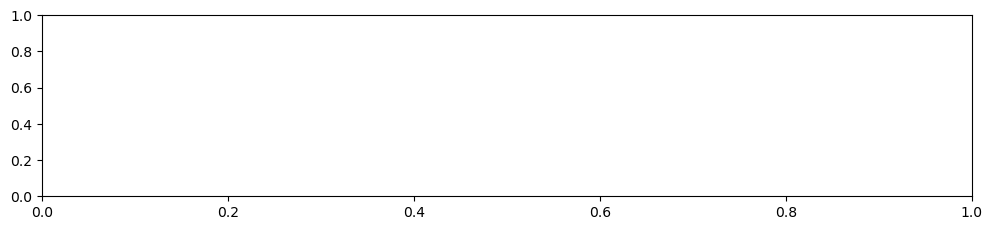

In [64]:
import matplotlib.pyplot as plt

# Visualize Logarithmic Fits
plt.figure(figsize=(12, 8))

# Gross Fit
plt.subplot(3, 1, 1)
plt.scatter(x_gross, y_gross_score, color='blue', label='Data')
plt.plot(x_gross, log_func(x_gross + 1, *params_y1), color='red', label='Fit')
plt.title("Logarithmic Fit for Gross Revenue")
plt.xlabel("Normalized Gross")
plt.ylabel("Score")
plt.legend()

# IMDB Rating Fit
plt.subplot(3, 1, 2)
plt.scatter(x_rating, y_rating_score, color='blue', label='Data')
plt.plot(x_rating, log_func(x_rating + 1, *params_y2), color='red', label='Fit')
plt.title("Logarithmic Fit for IMDB Rating")
plt.xlabel("Normalized IMDB Rating")
plt.ylabel("Score")
plt.legend()

# Meta Score Fit
plt.subplot(3, 1, 3)
plt.scatter(x_meta, y_meta_score, color='blue', label='Data')
plt.plot(x_meta, log_func(x_meta + 1, *params_y3), color='red', label='Fit')
plt.title("Logarithmic Fit for Meta Score")
plt.xlabel("Normalized Meta Score")
plt.ylabel("Score")
plt.legend()

plt.tight_layout()
plt.show()


In [66]:
import seaborn as sns

# Correlation Heatmap
correlation_matrix = data[['Normalized_Gross', 'Normalized_IMDB_Rating', 'Normalized_Meta_Score', 'Success_Score']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


KeyError: "None of [Index(['Normalized_Gross', 'Normalized_IMDB_Rating', 'Normalized_Meta_Score',\n       'Success_Score'],\n      dtype='object')] are in the [columns]"

In [ ]:
# Success Score by Genre
avg_score_by_genre = data.groupby('Genre_1')['Success_Score'].mean().sort_values()
plt.figure(figsize=(12, 6))
avg_score_by_genre.plot(kind='bar', color='orange')
plt.title("Average Success Score by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Success Score")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

# Load the Dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Step 1: Data Cleaning
# Ensure the Overview column has no missing values
data['Overview'] = data['Overview'].fillna('')

In [ ]:
# Step 2: Word Count Analysis
data['Word_Count'] = data['Overview'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(data['Word_Count'], bins=30, kde=True, color='green')
plt.title("Word Count Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [ ]:
# Step 3: Character Count Analysis
data['Char_Count'] = data['Overview'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data['Char_Count'], bins=30, kde=True, color='purple')
plt.title("Character Count Distribution")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [ ]:
# Step 4: Most Common Words
all_words = ' '.join(data['Overview']).split()
from collections import Counter
common_words = Counter(all_words).most_common(20)
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Frequency', data=common_words_df, palette='viridis')
plt.title("Most Common Words in Overviews")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Step 5: Sentiment Analysis
data['Polarity'] = data['Overview'].apply(lambda x: TextBlob(x).sentiment.polarity)
data['Subjectivity'] = data['Overview'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Polarity Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Polarity'], bins=30, kde=True, color='blue')
plt.title("Polarity Distribution")
plt.xlabel("Polarity")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [ ]:
# Subjectivity Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Subjectivity'], bins=30, kde=True, color='orange')
plt.title("Subjectivity Distribution")
plt.xlabel("Subjectivity")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [ ]:
# Step 6: N-Gram Analysis (Bigrams)
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X = vectorizer.fit_transform(data['Overview'])

# Convert the sparse matrix to a dense array and sum along columns
bigrams_sum = np.asarray(X.sum(axis=0)).flatten()

# Create a DataFrame with the bigrams and their frequencies
bigrams_df = pd.DataFrame({'Bigram': vectorizer.get_feature_names_out(), 'Frequency': bigrams_sum})
bigrams_df = bigrams_df.sort_values(by='Frequency', ascending=False).head(20)

# Plot the most common bigrams
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Bigram', data=bigrams_df, palette='viridis')
plt.title("Most Common Bigrams in Overviews")
plt.xlabel("Frequency")
plt.ylabel("Bigram")
plt.show()


In [ ]:
# Check for missing values
print(data['Overview'].isnull().sum())

# Get basic stats about the overviews
data['Overview_Length'] = data['Overview'].apply(len)
print(data['Overview_Length'].describe())

# Count unique overviews
print(data['Overview'].nunique())


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data['Overview_Length'], kde=True, bins=30)
plt.title("Distribution of Overview Lengths")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()


In [ ]:
import missingno as msno
msno.matrix(data[['Overview']])
plt.show()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\baradara.EGR\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\baradara.EGR\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


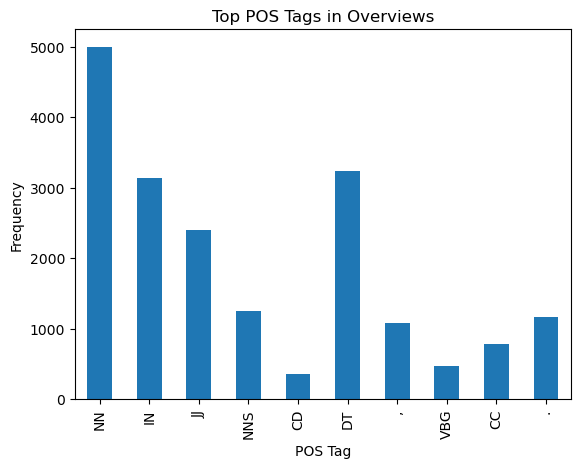

In [62]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def pos_analysis(text):
    words = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(words)
    return pd.Series([tag for _, tag in pos_tags]).value_counts()

pos_distribution = data['Overview'].apply(pos_analysis).sum()
pos_distribution.head(10).plot(kind='bar', title="Top POS Tags in Overviews")
plt.xlabel("POS Tag")
plt.ylabel("Frequency")
plt.show()


In [60]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize text
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Overview'])

# LDA Model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(tfidf_matrix)

# Display topics
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx}:")
    print([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])


Topic 0:
['years', 'story', 'family', 'team', 'life', 'woman', 'man', 'world', 'war', 'young']
Topic 1:
['deep', 'new', 'finds', 'story', 'love', 'boy', 'world', 'life', 'young', 'man']
Topic 2:
['mysterious', 'love', 'murder', 'young', 'man', 'family', 'new', 'woman', 'father', 'life']
Topic 3:
['mother', 'world', 'friends', 'lives', 'father', 'family', 'wife', 'new', 'man', 'young']
Topic 4:
['past', 'son', 'town', 'family', 'war', 'man', 'world', 'life', 'finds', 'young']


<Figure size 1000x600 with 0 Axes>

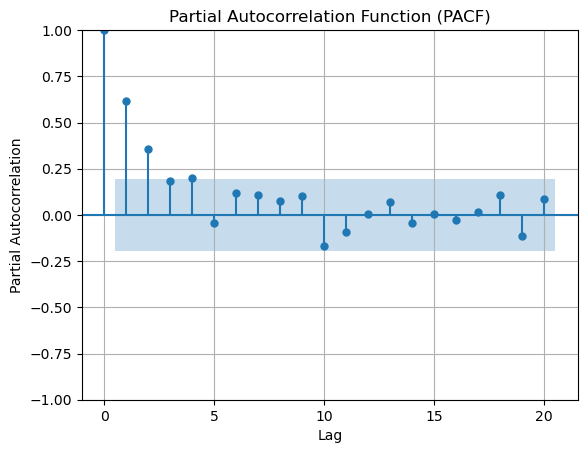

Mean Squared Error: 1768948633518520.50


C:\Users\baradara.EGR\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\baradara.EGR\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\baradara.EGR\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\baradara.EGR\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support

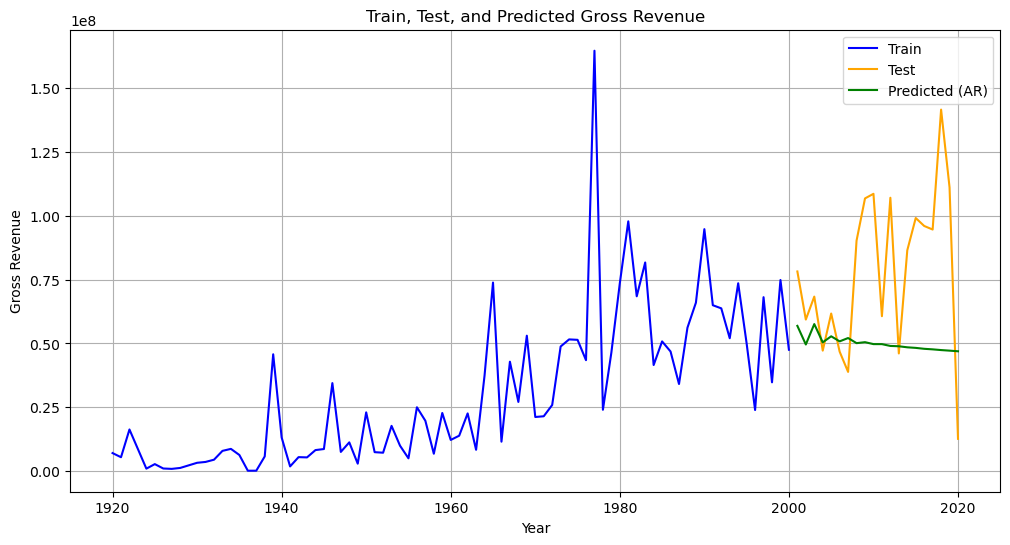

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Ensure Released_Year and Gross columns are properly formatted
data['Released_Year'] = pd.to_numeric(data['Released_Year'], errors='coerce')
data['Gross'] = pd.to_numeric(data['Gross'], errors='coerce')

# Drop rows with missing or invalid data in the relevant columns
data_cleaned = data.dropna(subset=['Released_Year', 'Gross'])

# Group by Released Year and calculate average gross revenue
gross_by_year = data_cleaned.groupby('Released_Year')['Gross'].mean().reset_index()

# Step 1: Prepare Time Series Data
gross_by_year = gross_by_year.sort_values(by='Released_Year')
gross_by_year.set_index('Released_Year', inplace=True)
time_series = gross_by_year['Gross']

# Step 2: PACF Analysis to Identify the Optimal Lag
plt.figure(figsize=(10, 6))
plot_pacf(time_series, lags=20, method='ywm')
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.grid()
plt.show()

# Based on the PACF plot, choose the optimal lag (for example, choose 4 based on the PACF)
optimal_lag = 4  # Update this based on PACF plot

# Step 3: Train-Test Split
train_size = int(len(time_series) * 0.8)
train, test = time_series[:train_size], time_series[train_size:]

# Step 4: Fit the Autoregression Model with the optimal lag
model = AutoReg(train, lags=optimal_lag)  # Use the optimal lag from PACF plot
model_fit = model.fit()

# Step 5: Make Predictions
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# Step 6: Evaluate the Model
mse = mean_squared_error(test, predictions)
print(f"Mean Squared Error: {mse:.2f}")

# Step 7: Plot Training, Test, and Predicted Data
plt.figure(figsize=(12, 6))

# Plot training data
plt.plot(train.index, train, label="Train", color='blue')

# Plot test data
plt.plot(test.index, test, label="Test", color='orange')

# Plot predicted data
plt.plot(test.index, predictions, label="Predicted (AR)", color='green')

# Add titles and labels
plt.title('Train, Test, and Predicted Gross Revenue')
plt.xlabel('Year')
plt.ylabel('Gross Revenue')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Ensure Released_Year and Gross columns are properly formatted
data['Released_Year'] = pd.to_numeric(data['Released_Year'], errors='coerce')
data['Gross'] = pd.to_numeric(data['Gross'], errors='coerce')

# Drop rows with missing or invalid data in the relevant columns
data_cleaned = data.dropna(subset=['Released_Year', 'Gross'])

# Filter data for years between 1960 and 2020
data_cleaned = data_cleaned[(data_cleaned['Released_Year'] >= 1960) & (data_cleaned['Released_Year'] <= 2020)]

# Group by Released Year and calculate average gross revenue
gross_by_year = data_cleaned.groupby('Released_Year')['Gross'].mean().reset_index()

# Step 1: Prepare Time Series Data
gross_by_year = gross_by_year.sort_values(by='Released_Year')
gross_by_year.set_index('Released_Year', inplace=True)
time_series = gross_by_year['Gross']

# Step 2: PACF Analysis to Identify the Optimal Lag
plt.figure(figsize=(10, 6))
plot_pacf(time_series, lags=20, method='ywm')
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.grid()
plt.show()

# Based on the PACF plot, choose the optimal lag (e.g., update this based on PACF plot)
optimal_lag = 4  # Adjust based on PACF analysis

# Step 3: Train-Test Split
train_size = int(len(time_series) * 0.8)
train, test = time_series[:train_size], time_series[train_size:]

# Step 4: Fit the Autoregression Model with the optimal lag
model = AutoReg(train, lags=optimal_lag)  # Use the optimal lag from PACF plot
model_fit = model.fit()

# Step 5: Make Predictions
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# Step 6: Evaluate the Model
mse = mean_squared_error(test, predictions)
print(f"Mean Squared Error: {mse:.2f}")

# Step 7: Plot Training, Test, and Predicted Data
plt.figure(figsize=(12, 6))

# Plot training data
plt.plot(train.index, train, label="Train", color='blue')

# Plot test data
plt.plot(test.index, test, label="Test", color='orange')

# Plot predicted data
plt.plot(test.index, predictions, label="Predicted (AR)", color='green')

# Add titles and labels
plt.title('Train, Test, and Predicted Gross Revenue')
plt.xlabel('Year')
plt.ylabel('Gross Revenue')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Step 1: Data Cleaning and Preprocessing
# Ensure numerical columns are properly formatted
data['Released_Year'] = pd.to_numeric(data['Released_Year'], errors='coerce')
data['Gross'] = pd.to_numeric(data['Gross'], errors='coerce')
data['IMDB_Rating'] = pd.to_numeric(data['IMDB_Rating'], errors='coerce')
data['No_of_Votes'] = pd.to_numeric(data['No_of_Votes'], errors='coerce')

# Drop rows with missing or invalid data in relevant columns
data_cleaned = data.dropna(subset=['Released_Year', 'Gross', 'IMDB_Rating', 'No_of_Votes'])

# Step 2: Feature Selection and Target Variable
# Define features and target variable
features = ['Released_Year', 'IMDB_Rating', 'No_of_Votes']
target = 'Gross'

X = data_cleaned[features]
y = data_cleaned[target]

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 5: Make Predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Step 7: Plot Feature Importance
feature_importances = model.feature_importances_
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Step 8: Visualize Actual vs Predicted Values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='blue')
plt.title('Actual vs Predicted Gross Revenue')
plt.xlabel('Actual Gross Revenue')
plt.ylabel('Predicted Gross Revenue')
plt.grid()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Data Cleaning
data['Released_Year'] = pd.to_numeric(data['Released_Year'], errors='coerce')
data['Gross'] = pd.to_numeric(data['Gross'], errors='coerce')
data['IMDB_Rating'] = pd.to_numeric(data['IMDB_Rating'], errors='coerce')
data['No_of_Votes'] = pd.to_numeric(data['No_of_Votes'], errors='coerce')

data_cleaned = data.dropna(subset=['Released_Year', 'Gross', 'IMDB_Rating', 'No_of_Votes'])

# Group by Released Year and calculate averages
aggregated_data = data_cleaned.groupby('Released_Year').agg({
    'Gross': 'mean',
    'IMDB_Rating': 'mean',
    'No_of_Votes': 'mean'
}).reset_index()

aggregated_data.set_index('Released_Year', inplace=True)
time_series = aggregated_data[['Gross', 'IMDB_Rating', 'No_of_Votes']]

# Standardize the data
scaler = StandardScaler()
time_series_scaled = pd.DataFrame(scaler.fit_transform(time_series), columns=time_series.columns, index=time_series.index)

# Train-Test Split
train_size = int(len(time_series_scaled) * 0.8)
train, test = time_series_scaled[:train_size], time_series_scaled[train_size:]

# Fit VAR Model
model = VAR(train)
model_fit = model.fit(maxlags=4)

# Make Predictions
forecast = model_fit.forecast(train.values, steps=len(test))
predictions = pd.DataFrame(forecast, index=test.index, columns=test.columns)

# Evaluate the Model
mse_gross = mean_squared_error(test['Gross'], predictions['Gross'])
print(f"Mean Squared Error (Gross): {mse_gross:.2f}")

# Plot Actual vs Predicted for Gross Revenue
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Gross'], label="Train (Gross)", color='blue')
plt.plot(test.index, test['Gross'], label="Test (Gross)", color='orange')
plt.plot(test.index, predictions['Gross'], label="Predicted (Gross)", color='green')
plt.title('Actual vs Predicted Gross Revenue')
plt.xlabel('Year')
plt.ylabel('Scaled Gross Revenue')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Ensure Released_Year and Gross columns are properly formatted
data['Released_Year'] = pd.to_numeric(data['Released_Year'], errors='coerce')
data['Gross'] = pd.to_numeric(data['Gross'], errors='coerce')

# Drop rows with missing or invalid data in the relevant columns
data_cleaned = data.dropna(subset=['Released_Year', 'Gross'])

# Group by Released Year and calculate average gross revenue
gross_by_year = data_cleaned.groupby('Released_Year')['Gross'].mean().reset_index()

# Step 1: Prepare Time Series Data
gross_by_year = gross_by_year.sort_values(by='Released_Year')
gross_by_year.set_index('Released_Year', inplace=True)
time_series = gross_by_year['Gross']

# Step 2: Create Lagged Features
optimal_lag = 4  # Define the number of lagged features
data_lagged = pd.DataFrame(time_series)

for lag in range(1, optimal_lag + 1):
    data_lagged[f'lag_{lag}'] = data_lagged['Gross'].shift(lag)

# Drop rows with NaN values introduced by lagging
data_lagged = data_lagged.dropna()

# Step 3: Train-Test Split
X = data_lagged[[f'lag_{i}' for i in range(1, optimal_lag + 1)]]
y = data_lagged['Gross']
train_size = int(len(X) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# Step 4: Fit the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make Predictions
predictions = model.predict(X_test)

# Step 6: Evaluate the Model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse:.2f}")

# Step 7: Plot Training, Test, and Predicted Data
plt.figure(figsize=(12, 6))

# Plot training data
plt.plot(X_train.index, y_train, label="Train", color='blue')

# Plot test data
plt.plot(X_test.index, y_test, label="Test", color='orange')

# Plot predicted data
plt.plot(X_test.index, predictions, label="Predicted (Linear Regression)", color='green')

# Add titles and labels
plt.title('Train, Test, and Predicted Gross Revenue')
plt.xlabel('Year')
plt.ylabel('Gross Revenue')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Ensure Released_Year and Gross columns are properly formatted
data['Released_Year'] = pd.to_numeric(data['Released_Year'], errors='coerce')
data['Gross'] = pd.to_numeric(data['Gross'], errors='coerce')

# Drop rows with missing or invalid data in the relevant columns
data_cleaned = data.dropna(subset=['Released_Year', 'Gross'])

# Group by Released Year and calculate average gross revenue
gross_by_year = data_cleaned.groupby('Released_Year')['Gross'].mean().reset_index()

# Step 1: Prepare Data for Prophet
# Rename columns to match Prophet's expectations
gross_by_year.rename(columns={'Released_Year': 'ds', 'Gross': 'y'}, inplace=True)

# Filter the data to include years between 1960 and 2020
gross_by_year = gross_by_year[(gross_by_year['ds'] >= 1960) & (gross_by_year['ds'] <= 2020)]

# Step 2: Train-Test Split
train_size = int(len(gross_by_year) * 0.8)
train = gross_by_year.iloc[:train_size]
test = gross_by_year.iloc[train_size:]

# Step 3: Initialize and Fit the Prophet Model
model = Prophet()
model.fit(train)

# Step 4: Make Future Predictions
future = model.make_future_dataframe(periods=len(test), freq='Y')
forecast = model.predict(future)

# Step 5: Evaluate the Model
# Extract the predicted values for the test period
predicted_test = forecast.iloc[-len(test):]['yhat'].values
mse = mean_squared_error(test['y'], predicted_test)
print(f"Mean Squared Error: {mse:.2f}")

# Step 6: Plot the Results
# Plot the full forecast
fig = model.plot(forecast)
plt.title('Forecast of Gross Revenue')
plt.xlabel('Year')
plt.ylabel('Gross Revenue')
plt.show()

# Plot the components of the forecast (trend and seasonality)
fig2 = model.plot_components(forecast)
plt.show()

# Plot training, test, and predicted data for comparison
plt.figure(figsize=(12, 6))
plt.plot(train['ds'], train['y'], label="Train", color='blue')
plt.plot(test['ds'], test['y'], label="Test", color='orange')
plt.plot(test['ds'], predicted_test, label="Predicted (Prophet)", color='green')
plt.title('Train, Test, and Predicted Gross Revenue')
plt.xlabel('Year')
plt.ylabel('Gross Revenue')
plt.legend()
plt.grid()
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load and preprocess the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')
data['Released_Year'] = pd.to_numeric(data['Released_Year'], errors='coerce')
data['Gross'] = pd.to_numeric(data['Gross'], errors='coerce')
data_cleaned = data.dropna(subset=['Released_Year', 'Gross'])

# Filter for 1960–2020
gross_by_year = (
    data_cleaned.groupby('Released_Year')['Gross'].mean().reset_index()
)
gross_by_year = gross_by_year[(gross_by_year['Released_Year'] >= 1960) & 
                              (gross_by_year['Released_Year'] <= 2020)]
gross_by_year.set_index('Released_Year', inplace=True)

# Train-Test Split
train_size = int(len(gross_by_year) * 0.8)
train, test = gross_by_year[:train_size], gross_by_year[train_size:]

# Fit ARIMA Model
arima_model = ARIMA(train, order=(5, 1, 0))  # Adjust (p, d, q) based on experimentation
arima_result = arima_model.fit()

# Make Predictions
forecast = arima_result.forecast(steps=len(test))
mse = mean_squared_error(test, forecast)
print(f"Mean Squared Error (ARIMA): {mse:.2f}")

# Plot Results
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train', color='blue')
plt.plot(test, label='Test', color='orange')
plt.plot(test.index, forecast, label='Forecast (ARIMA)', color='green')
plt.title('ARIMA Forecast')
plt.xlabel('Year')
plt.ylabel('Gross Revenue')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Load and preprocess the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')
data['Released_Year'] = pd.to_numeric(data['Released_Year'], errors='coerce')
data['Gross'] = pd.to_numeric(data['Gross'], errors='coerce')
data_cleaned = data.dropna(subset=['Released_Year', 'Gross'])

# Filter for years between 1960 and 2020
gross_by_year = data_cleaned.groupby('Released_Year')['Gross'].mean().reset_index()
gross_by_year = gross_by_year[(gross_by_year['Released_Year'] >= 1960) & 
                              (gross_by_year['Released_Year'] <= 2020)]

# Feature Scaling
scaler = StandardScaler()
gross_by_year['Scaled_Gross'] = scaler.fit_transform(gross_by_year[['Gross']])

# Step 1: K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # 3 clusters
gross_by_year['Cluster'] = kmeans.fit_predict(gross_by_year[['Scaled_Gross']])

# Visualize Clustering Results
plt.figure(figsize=(12, 6))
for cluster in gross_by_year['Cluster'].unique():
    cluster_data = gross_by_year[gross_by_year['Cluster'] == cluster]
    plt.scatter(cluster_data['Released_Year'], cluster_data['Gross'], label=f'Cluster {cluster}')
plt.title('K-Means Clustering on Gross Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Gross Revenue')
plt.legend()
plt.grid()
plt.show()

# Step 2: Isolation Forest for Anomaly Detection
iso_forest = IsolationForest(random_state=42, contamination=0.1)  # Adjust contamination as needed
gross_by_year['Anomaly'] = iso_forest.fit_predict(gross_by_year[['Scaled_Gross']])

# Mark anomalies
anomalies = gross_by_year[gross_by_year['Anomaly'] == -1]
normal = gross_by_year[gross_by_year['Anomaly'] == 1]

# Visualize Anomalies
plt.figure(figsize=(12, 6))
plt.scatter(normal['Released_Year'], normal['Gross'], label='Normal', color='blue')
plt.scatter(anomalies['Released_Year'], anomalies['Gross'], label='Anomaly', color='red')
plt.title('Anomaly Detection in Gross Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Gross Revenue')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest, RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load and preprocess the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')
data['Released_Year'] = pd.to_numeric(data['Released_Year'], errors='coerce')
data['Gross'] = pd.to_numeric(data['Gross'], errors='coerce')
data_cleaned = data.dropna(subset=['Released_Year', 'Gross', 'IMDB_Rating', 'No_of_Votes'])

# Filter data between 1960 and 2020
gross_by_year = data_cleaned.groupby('Released_Year')[['Gross', 'IMDB_Rating', 'No_of_Votes']].mean().reset_index()
gross_by_year = gross_by_year[(gross_by_year['Released_Year'] >= 1960) & 
                              (gross_by_year['Released_Year'] <= 2020)]

# Feature Scaling
scaler = StandardScaler()
gross_by_year[['Scaled_Gross', 'Scaled_IMDB_Rating', 'Scaled_No_of_Votes']] = scaler.fit_transform(
    gross_by_year[['Gross', 'IMDB_Rating', 'No_of_Votes']]
)

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
gross_by_year['Cluster'] = kmeans.fit_predict(gross_by_year[['Scaled_Gross', 'Scaled_IMDB_Rating', 'Scaled_No_of_Votes']])

# Isolation Forest for Anomaly Detection
iso_forest = IsolationForest(random_state=42, contamination=0.1)
gross_by_year['Anomaly'] = iso_forest.fit_predict(gross_by_year[['Scaled_Gross', 'Scaled_IMDB_Rating', 'Scaled_No_of_Votes']])

# Prepare Features and Target for Prediction
features = ['IMDB_Rating', 'No_of_Votes', 'Cluster', 'Anomaly']
X = gross_by_year[features]
y = gross_by_year['Gross']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Gross Revenue')
plt.xlabel('Actual Gross Revenue')
plt.ylabel('Predicted Gross Revenue')
plt.grid()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Ensure Released_Year and Gross columns are properly formatted
data['Released_Year'] = pd.to_numeric(data['Released_Year'], errors='coerce')
data['Gross'] = pd.to_numeric(data['Gross'], errors='coerce')

# Drop rows with missing or invalid data in the relevant columns
data_cleaned = data.dropna(subset=['Released_Year', 'Gross'])

# Group by Released Year and calculate the total gross revenue for each year
gross_by_year = data_cleaned.groupby('Released_Year')['Gross'].sum().reset_index()

# Sort values by year
gross_by_year = gross_by_year.sort_values(by='Released_Year')

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(gross_by_year['Released_Year'], gross_by_year['Gross'], marker='o', color='skyblue', label='Gross Revenue')

# Add titles and labels
plt.title('Gross Revenue Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Gross Revenue (in billions)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Preprocessing
data['Released_Year'] = pd.to_numeric(data['Released_Year'], errors='coerce')
data['Gross'] = pd.to_numeric(data['Gross'], errors='coerce')
data = data.dropna(subset=['Released_Year', 'Gross'])

# Features and Target
X = data[['Released_Year']]  # Use Released_Year as the feature
y = data['Gross']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting Regressor
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Plot Predictions
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.title("Predicted vs Actual Gross Revenue")
plt.xlabel("Released Year")
plt.ylabel("Gross Revenue")
plt.legend()
plt.grid()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Preprocessing
data['Released_Year'] = pd.to_numeric(data['Released_Year'], errors='coerce')
data['Gross'] = pd.to_numeric(data['Gross'], errors='coerce')
data = data.dropna(subset=['Released_Year', 'Gross'])

# Filter data for years between 1960 and 2020
data = data[(data['Released_Year'] >= 1960) & (data['Released_Year'] <= 2020)]

# Features (X) and Target (y)
X = data[['Released_Year']]
y = data['Gross']

# Polynomial Transformation (Degree 2 or higher if needed)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Fit Polynomial Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate Model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Visualize Results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(poly.fit_transform(X)), color='red', label='Polynomial Fit')
plt.title("Gross Revenue Over the Years (Polynomial Regression)")
plt.xlabel("Released Year")
plt.ylabel("Gross Revenue")
plt.legend()
plt.grid()
plt.show()

# Predict future values (e.g., for 2021 to 2030)
future_years = pd.DataFrame({'Released_Year': range(2021, 2031)})
future_years_poly = poly.transform(future_years)
future_gross = model.predict(future_years_poly)

print("Future Predictions (2021-2030):")
for year, gross in zip(future_years['Released_Year'], future_gross):
    print(f"Year {year}: Predicted Gross Revenue = {gross:.2f}")


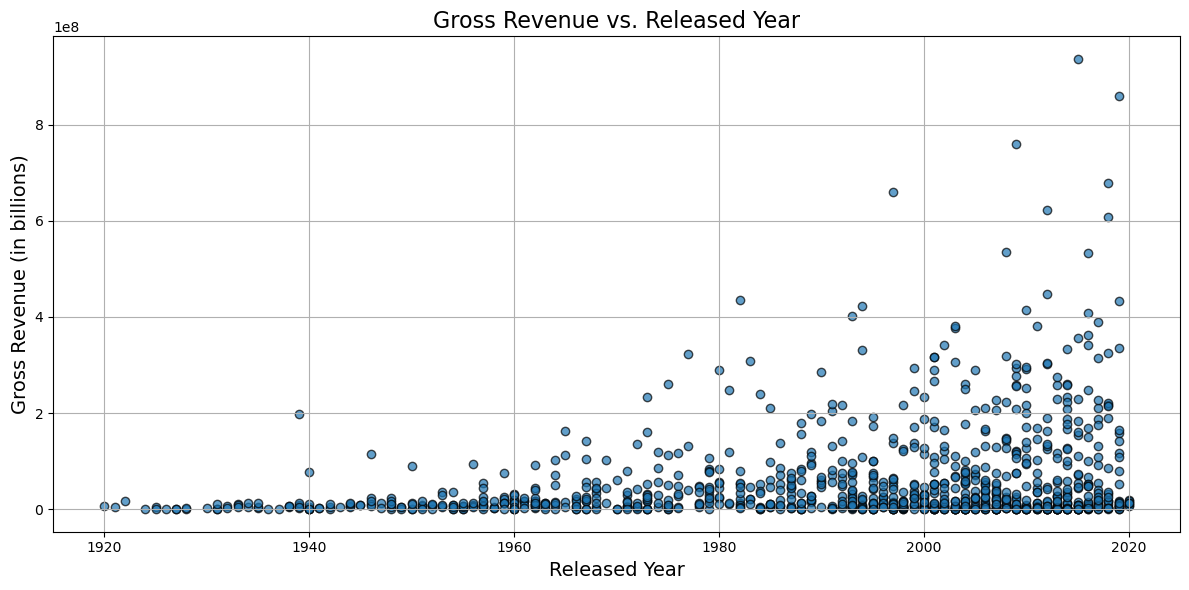

In [56]:
import matplotlib.pyplot as plt

# Ensure 'Released_Year' is numeric for proper plotting
data['Released_Year'] = pd.to_numeric(data['Released_Year'], errors='coerce')
data['Gross'] = pd.to_numeric(data['Gross'], errors='coerce')

# Drop rows with NaN values in the columns of interest
filtered_data = data.dropna(subset=['Released_Year', 'Gross'])

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(filtered_data['Released_Year'], filtered_data['Gross'], alpha=0.7, edgecolors='k')
plt.title('Gross Revenue vs. Released Year', fontsize=16)
plt.xlabel('Released Year', fontsize=14)
plt.ylabel('Gross Revenue (in billions)', fontsize=14)
plt.grid(True)
plt.tight_layout()

plt.show()


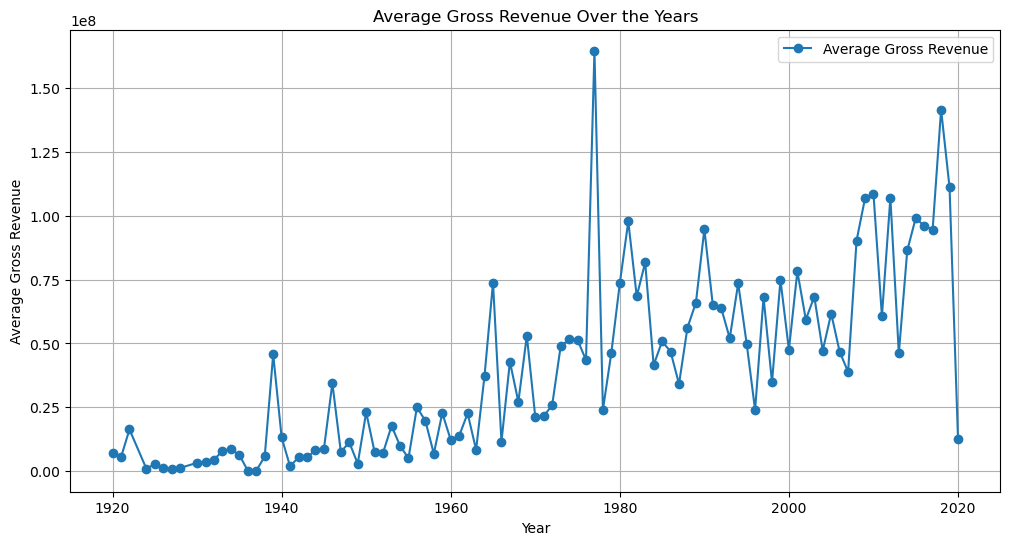

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Ensure Released_Year and Gross columns are properly formatted
data['Released_Year'] = pd.to_numeric(data['Released_Year'], errors='coerce')
data['Gross'] = pd.to_numeric(data['Gross'], errors='coerce')

# Drop rows with missing or invalid data in the relevant columns
data_cleaned = data.dropna(subset=['Released_Year', 'Gross'])

# Group by Released Year and calculate average gross revenue
gross_by_year = data_cleaned.groupby('Released_Year')['Gross'].mean().reset_index()

# Plotting the gross revenue over the years
plt.figure(figsize=(12, 6))
plt.plot(gross_by_year['Released_Year'], gross_by_year['Gross'], marker='o', linestyle='-', label='Average Gross Revenue')
plt.title('Average Gross Revenue Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Gross Revenue')
plt.grid()
plt.legend()
plt.show()


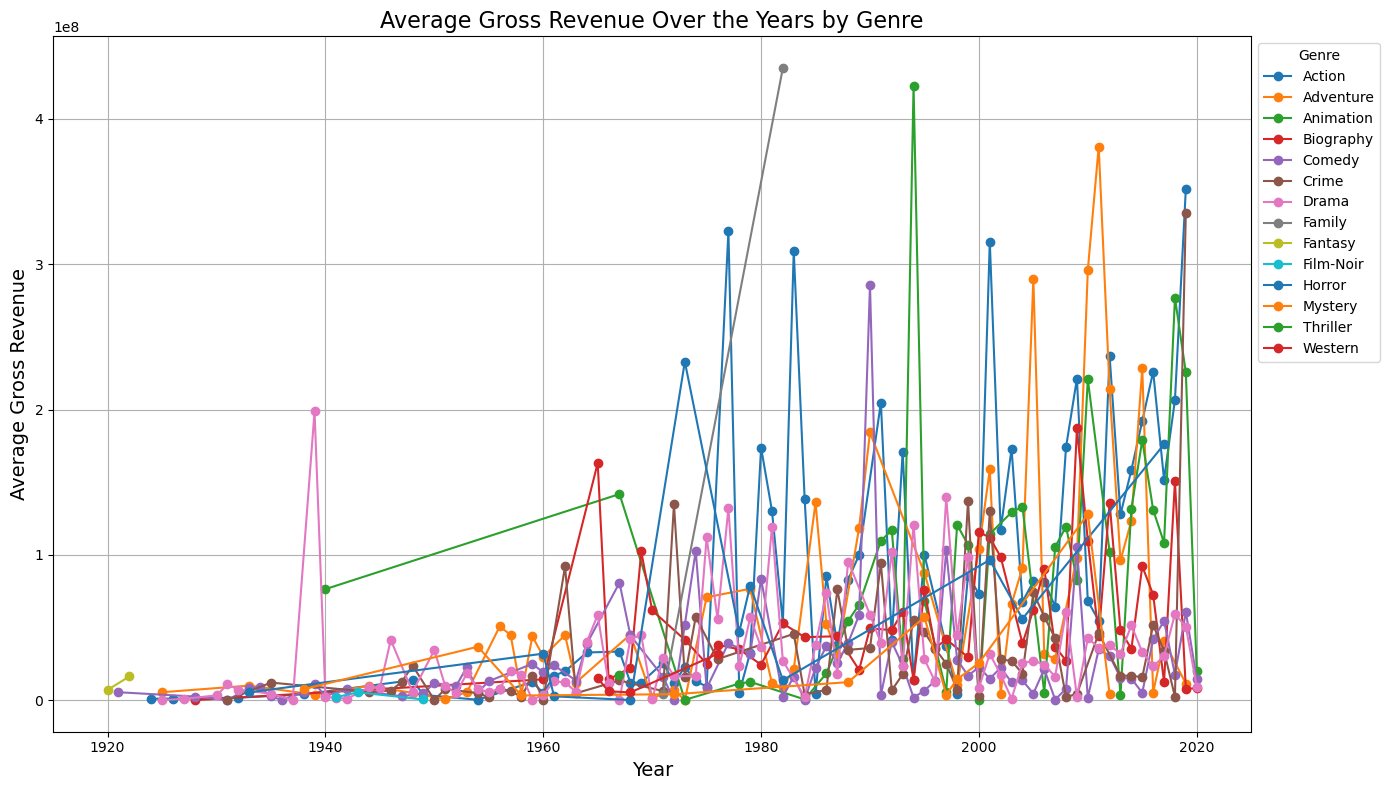

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Ensure Released_Year, Gross, and Genre_1 columns are properly formatted
data['Released_Year'] = pd.to_numeric(data['Released_Year'], errors='coerce')
data['Gross'] = pd.to_numeric(data['Gross'], errors='coerce')

# Drop rows with missing or invalid data in the relevant columns
data_cleaned = data.dropna(subset=['Released_Year', 'Gross', 'Genre_1'])

# Group by Genre_1 and Released_Year, and calculate average gross revenue
gross_by_genre = (
    data_cleaned.groupby(['Genre_1', 'Released_Year'])['Gross']
    .mean()
    .reset_index()
)

# Get unique genres for plotting
genres = gross_by_genre['Genre_1'].unique()

# Plotting
plt.figure(figsize=(14, 8))
for genre in genres:
    genre_data = gross_by_genre[gross_by_genre['Genre_1'] == genre]
    plt.plot(
        genre_data['Released_Year'], 
        genre_data['Gross'], 
        marker='o', 
        linestyle='-', 
        label=genre
    )

# Add chart elements
plt.title('Average Gross Revenue Over the Years by Genre', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Gross Revenue', fontsize=14)
plt.legend(title='Genre', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid()
plt.tight_layout()

# Display the plot
plt.show()


Enter a genre from the following list:
['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Horror', 'Mystery', 'Thriller', 'Western']
 Drama


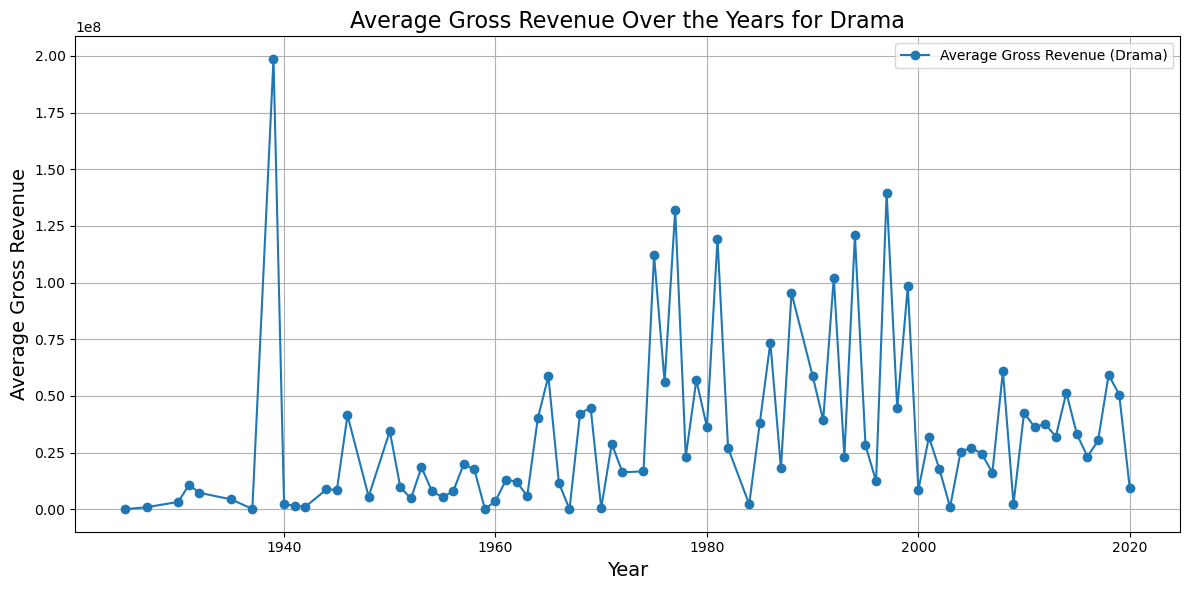

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Ensure Released_Year, Gross, and Genre_1 columns are properly formatted
data['Released_Year'] = pd.to_numeric(data['Released_Year'], errors='coerce')
data['Gross'] = pd.to_numeric(data['Gross'], errors='coerce')

# Drop rows with missing or invalid data in the relevant columns
data_cleaned = data.dropna(subset=['Released_Year', 'Gross', 'Genre_1'])

# Group by Genre_1 and Released_Year, and calculate average gross revenue
gross_by_genre = (
    data_cleaned.groupby(['Genre_1', 'Released_Year'])['Gross']
    .mean()
    .reset_index()
)

# Ask user for input
user_genre = input(f"Enter a genre from the following list:\n{list(gross_by_genre['Genre_1'].unique())}\n")

# Check if the entered genre exists
if user_genre in gross_by_genre['Genre_1'].unique():
    # Filter data for the selected genre
    genre_data = gross_by_genre[gross_by_genre['Genre_1'] == user_genre]
    
    # Plot the data
    plt.figure(figsize=(12, 6))
    plt.plot(
        genre_data['Released_Year'], 
        genre_data['Gross'], 
        marker='o', 
        linestyle='-', 
        label=f'Average Gross Revenue ({user_genre})'
    )
    
    # Add chart elements
    plt.title(f'Average Gross Revenue Over the Years for {user_genre}', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Average Gross Revenue', fontsize=14)
    plt.grid()
    plt.legend()
    plt.tight_layout()
    
    # Display the plot
    plt.show()
else:
    print("The entered genre is not in the dataset. Please check the genre list and try again.")


Enter a certificate from the following list:
['Approved', 'G', 'PG', 'PG-13', 'R']
 G


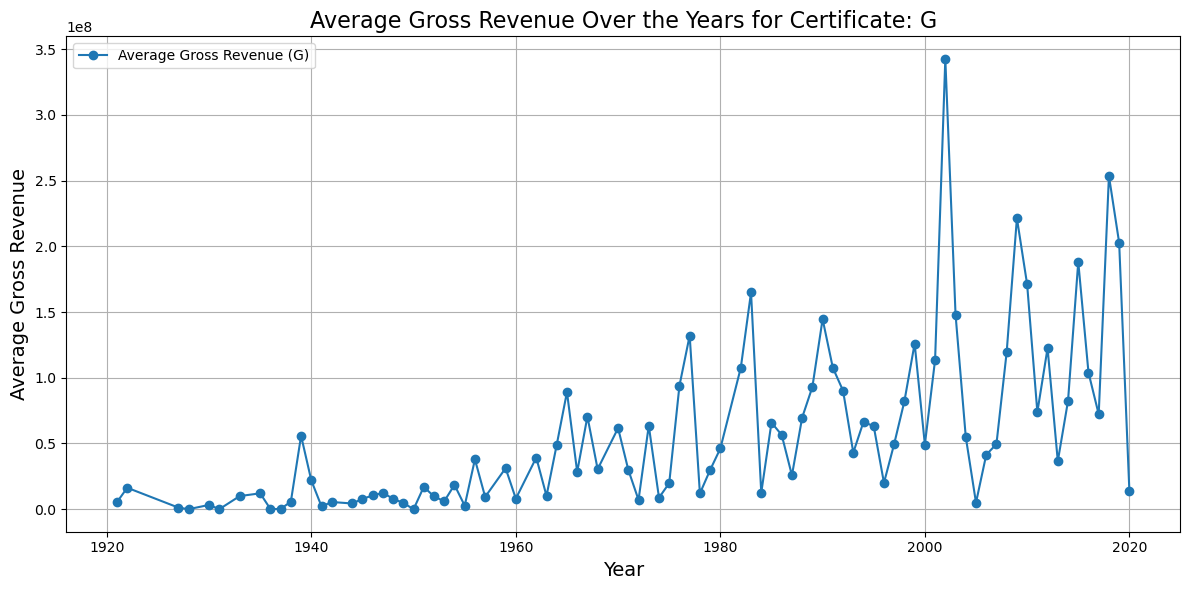

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Ensure Released_Year and Gross columns are properly formatted
data['Released_Year'] = pd.to_numeric(data['Released_Year'], errors='coerce')
data['Gross'] = pd.to_numeric(data['Gross'], errors='coerce')

# Drop rows with missing or invalid data in the relevant columns
data_cleaned = data.dropna(subset=['Released_Year', 'Gross', 'Certificate'])

# Group by Certificate and Released_Year, and calculate average gross revenue
gross_by_certificate = (
    data_cleaned.groupby(['Certificate', 'Released_Year'])['Gross']
    .mean()
    .reset_index()
)

# Ask user for input
user_certificate = input(f"Enter a certificate from the following list:\n{list(gross_by_certificate['Certificate'].unique())}\n")

# Check if the entered certificate exists
if user_certificate in gross_by_certificate['Certificate'].unique():
    # Filter data for the selected certificate
    certificate_data = gross_by_certificate[gross_by_certificate['Certificate'] == user_certificate]
    
    # Plot the data
    plt.figure(figsize=(12, 6))
    plt.plot(
        certificate_data['Released_Year'], 
        certificate_data['Gross'], 
        marker='o', 
        linestyle='-', 
        label=f'Average Gross Revenue ({user_certificate})'
    )
    
    # Add chart elements
    plt.title(f'Average Gross Revenue Over the Years for Certificate: {user_certificate}', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Average Gross Revenue', fontsize=14)
    plt.grid()
    plt.legend()
    plt.tight_layout()
    
    # Display the plot
    plt.show()
else:
    print("The entered certificate is not in the dataset. Please check the certificate list and try again.")


Enter a certificate from the following list:
['Approved', 'G', 'PG', 'PG-13', 'R']
 G


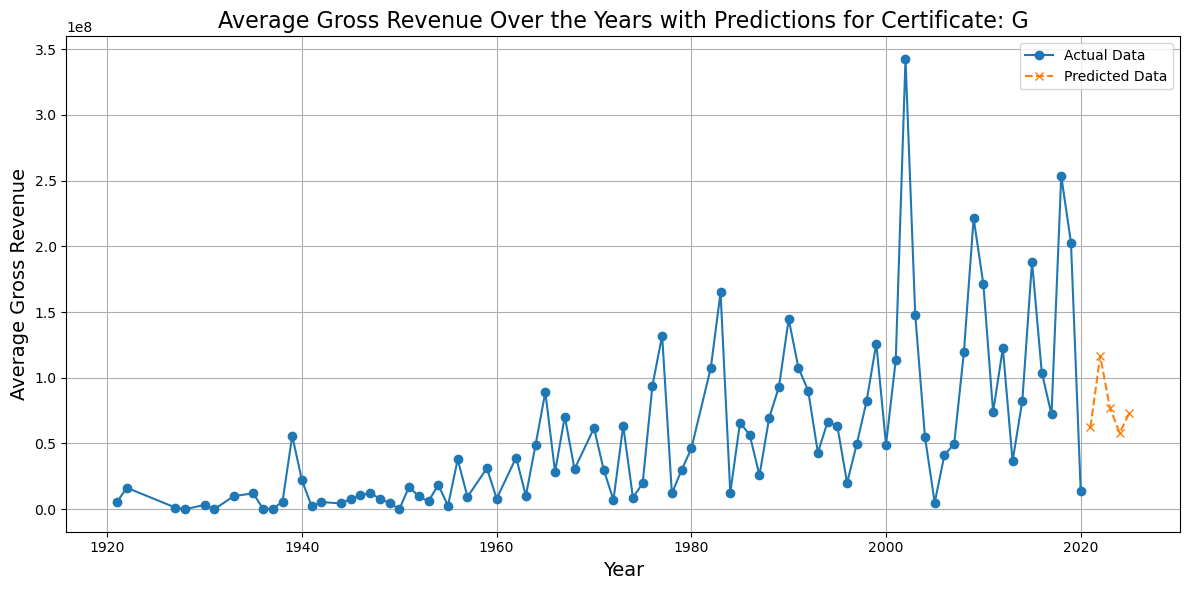

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
import numpy as np

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Ensure Released_Year and Gross columns are properly formatted
data['Released_Year'] = pd.to_numeric(data['Released_Year'], errors='coerce')
data['Gross'] = pd.to_numeric(data['Gross'], errors='coerce')

# Drop rows with missing or invalid data in the relevant columns
data_cleaned = data.dropna(subset=['Released_Year', 'Gross', 'Certificate'])

# Group by Certificate and Released_Year, and calculate average gross revenue
gross_by_certificate = (
    data_cleaned.groupby(['Certificate', 'Released_Year'])['Gross']
    .mean()
    .reset_index()
)

# Ask user for input
user_certificate = input(f"Enter a certificate from the following list:\n{list(gross_by_certificate['Certificate'].unique())}\n")

# Check if the entered certificate exists
if user_certificate in gross_by_certificate['Certificate'].unique():
    # Filter data for the selected certificate
    certificate_data = gross_by_certificate[gross_by_certificate['Certificate'] == user_certificate]

    # Sort data by year
    certificate_data = certificate_data.sort_values(by='Released_Year')

    # Prepare the time series for autoregression
    years = certificate_data['Released_Year'].values
    gross_revenue = certificate_data['Gross'].values

    # Fit an autoregressive model
    model = AutoReg(gross_revenue, lags=3)
    model_fit = model.fit()

    # Predict the next 5 years
    future_years = np.arange(years[-1] + 1, years[-1] + 6)
    predictions = model_fit.predict(start=len(gross_revenue), end=len(gross_revenue) + 4)

    # Combine actual and predicted data
    future_data = pd.DataFrame({'Released_Year': future_years, 'Gross': predictions})
    full_data = pd.concat([certificate_data, future_data], ignore_index=True)

    # Plot the data
    plt.figure(figsize=(12, 6))
    plt.plot(certificate_data['Released_Year'], certificate_data['Gross'], marker='o', linestyle='-', label='Actual Data')
    plt.plot(future_data['Released_Year'], future_data['Gross'], marker='x', linestyle='--', label='Predicted Data')
    
    # Add chart elements
    plt.title(f'Average Gross Revenue Over the Years with Predictions for Certificate: {user_certificate}', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Average Gross Revenue', fontsize=14)
    plt.grid()
    plt.legend()
    plt.tight_layout()
    
    # Display the plot
    plt.show()

else:
    print("The entered certificate is not in the dataset. Please check the certificate list and try again.")


Enter a certificate from the following list:
['Approved', 'G', 'PG', 'PG-13', 'R']
 G
Enter a genre from the following list:
['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Horror', 'Mystery', 'Thriller', 'Western']
 Animation


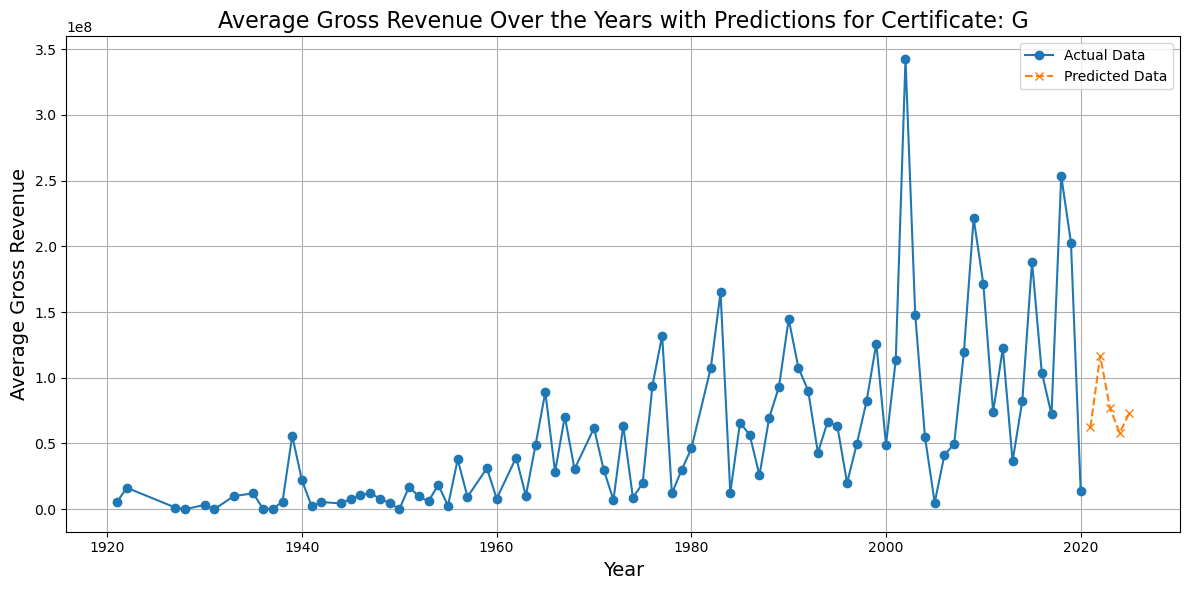

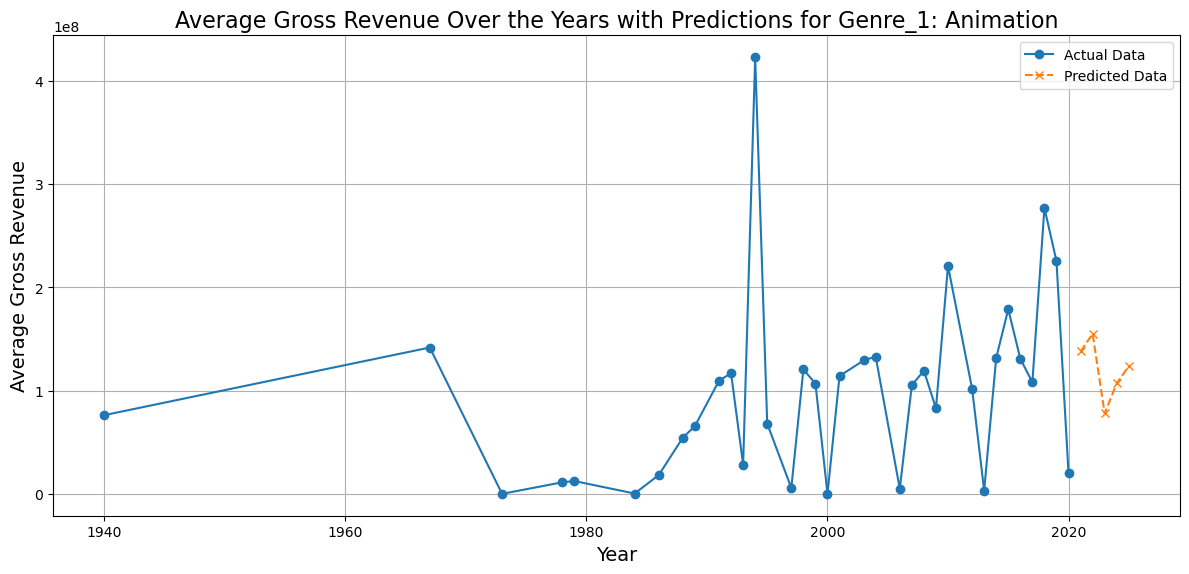

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
import numpy as np

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Ensure Released_Year, Gross, Certificate, and Genre_1 columns are properly formatted
data['Released_Year'] = pd.to_numeric(data['Released_Year'], errors='coerce')
data['Gross'] = pd.to_numeric(data['Gross'], errors='coerce')

# Drop rows with missing or invalid data in the relevant columns
data_cleaned = data.dropna(subset=['Released_Year', 'Gross', 'Certificate', 'Genre_1'])

# Group by Certificate and Released_Year, and calculate average gross revenue
gross_by_certificate = (
    data_cleaned.groupby(['Certificate', 'Released_Year'])['Gross']
    .mean()
    .reset_index()
)

# Group by Genre_1 and Released_Year, and calculate average gross revenue
gross_by_genre = (
    data_cleaned.groupby(['Genre_1', 'Released_Year'])['Gross']
    .mean()
    .reset_index()
)

# Ask user for inputs
user_certificate = input(f"Enter a certificate from the following list:\n{list(gross_by_certificate['Certificate'].unique())}\n")
user_genre = input(f"Enter a genre from the following list:\n{list(gross_by_genre['Genre_1'].unique())}\n")

# Function to perform autoregression and plot predictions
def plot_autoregression(data, group_name, group_value):
    # Filter data for the selected group
    group_data = data[data[group_name] == group_value]
    
    # Sort data by year
    group_data = group_data.sort_values(by='Released_Year')
    
    # Prepare the time series for autoregression
    years = group_data['Released_Year'].values
    gross_revenue = group_data['Gross'].values
    
    # Fit an autoregressive model
    model = AutoReg(gross_revenue, lags=3)
    model_fit = model.fit()
    
    # Predict the next 5 years
    future_years = np.arange(years[-1] + 1, years[-1] + 6)
    predictions = model_fit.predict(start=len(gross_revenue), end=len(gross_revenue) + 4)
    
    # Combine actual and predicted data
    future_data = pd.DataFrame({'Released_Year': future_years, 'Gross': predictions})
    full_data = pd.concat([group_data, future_data], ignore_index=True)
    
    # Plot the data
    plt.figure(figsize=(12, 6))
    plt.plot(group_data['Released_Year'], group_data['Gross'], marker='o', linestyle='-', label='Actual Data')
    plt.plot(future_data['Released_Year'], future_data['Gross'], marker='x', linestyle='--', label='Predicted Data')
    
    # Add chart elements
    plt.title(f'Average Gross Revenue Over the Years with Predictions for {group_name}: {group_value}', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Average Gross Revenue', fontsize=14)
    plt.grid()
    plt.legend()
    plt.tight_layout()
    
    # Display the plot
    plt.show()

# Check and plot for Certificate
if user_certificate in gross_by_certificate['Certificate'].unique():
    plot_autoregression(gross_by_certificate, 'Certificate', user_certificate)
else:
    print("The entered certificate is not in the dataset. Please check the certificate list and try again.")

# Check and plot for Genre_1
if user_genre in gross_by_genre['Genre_1'].unique():
    plot_autoregression(gross_by_genre, 'Genre_1', user_genre)
else:
    print("The entered genre is not in the dataset. Please check the genre list and try again.")


Enter a certificate from the following list:
['Approved', 'G', 'PG', 'PG-13', 'R']
 Approved


Mean Squared Error (MSE): 32684796290300.87
Root Mean Squared Error (RMSE): 5717061.86


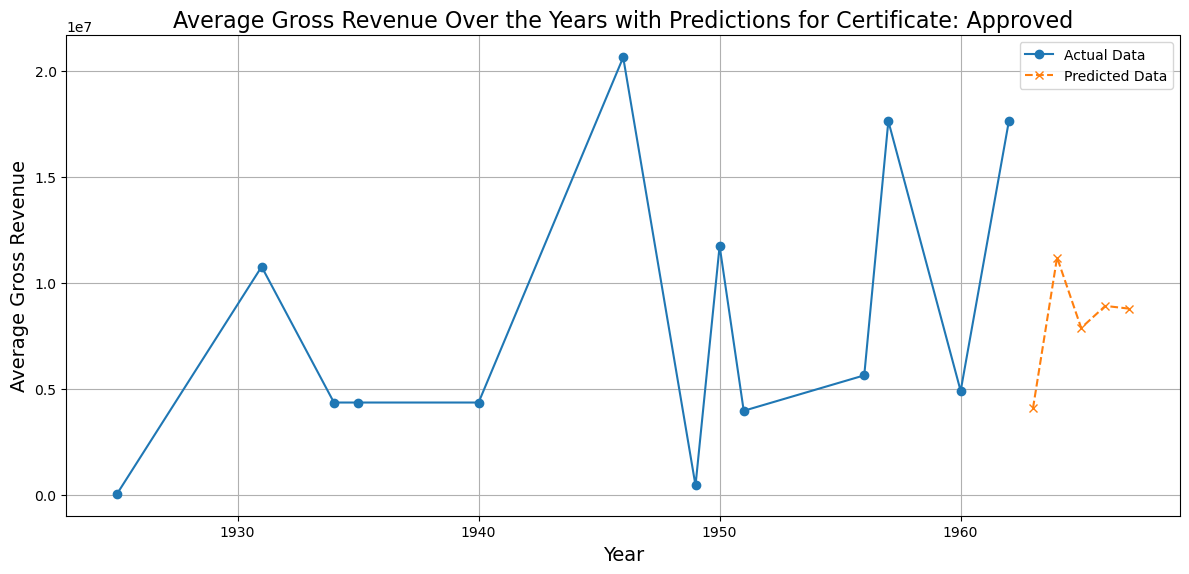

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Ensure Released_Year and Gross columns are properly formatted
data['Released_Year'] = pd.to_numeric(data['Released_Year'], errors='coerce')
data['Gross'] = pd.to_numeric(data['Gross'], errors='coerce')

# Drop rows with missing or invalid data in the relevant columns
data_cleaned = data.dropna(subset=['Released_Year', 'Gross', 'Certificate'])

# Group by Certificate and Released_Year, and calculate average gross revenue
gross_by_certificate = (
    data_cleaned.groupby(['Certificate', 'Released_Year'])['Gross']
    .mean()
    .reset_index()
)

# Ask user for input
user_certificate = input(f"Enter a certificate from the following list:\n{list(gross_by_certificate['Certificate'].unique())}\n")

# Check if the entered certificate exists
if user_certificate in gross_by_certificate['Certificate'].unique():
    # Filter data for the selected certificate
    certificate_data = gross_by_certificate[gross_by_certificate['Certificate'] == user_certificate]

    # Sort data by year
    certificate_data = certificate_data.sort_values(by='Released_Year')

    # Prepare the time series for autoregression
    years = certificate_data['Released_Year'].values
    gross_revenue = certificate_data['Gross'].values

    # Fit an autoregressive model
    model = AutoReg(gross_revenue, lags=3)
    model_fit = model.fit()

    # Predict the next 5 years
    future_years = np.arange(years[-1] + 1, years[-1] + 6)
    predictions = model_fit.predict(start=len(gross_revenue), end=len(gross_revenue) + 4)

    # Combine actual and predicted data
    future_data = pd.DataFrame({'Released_Year': future_years, 'Gross': predictions})
    full_data = pd.concat([certificate_data, future_data], ignore_index=True)

    # Calculate error for the training data predictions
    train_predictions = model_fit.predict(start=3, end=len(gross_revenue) - 1)
    actual_train = gross_revenue[3:]
    mse = mean_squared_error(actual_train, train_predictions)
    rmse = np.sqrt(mse)

    # Print the error
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

    # Plot the data
    plt.figure(figsize=(12, 6))
    plt.plot(certificate_data['Released_Year'], certificate_data['Gross'], marker='o', linestyle='-', label='Actual Data')
    plt.plot(future_data['Released_Year'], future_data['Gross'], marker='x', linestyle='--', label='Predicted Data')
    
    # Add chart elements
    plt.title(f'Average Gross Revenue Over the Years with Predictions for Certificate: {user_certificate}', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Average Gross Revenue', fontsize=14)
    plt.grid()
    plt.legend()
    plt.tight_layout()
    
    # Display the plot
    plt.show()

else:
    print("The entered certificate is not in the dataset. Please check the certificate list and try again.")
